## 라이브러리 import

In [1]:
import pandas as pd  # 데이터 분석
import numpy as np # 수치 계산
import datetime as dt # 날짜 형식
from glob import glob # 파일 경로
import missingno as msno # 결측치 시각화
import seaborn as sns # 데이터 시각화
import matplotlib.pyplot as plt # 데이터 시각화
import koreanize_matplotlib # 시각화 한글 폰트
%config InlineBackend.figure_format = 'retina'

## 파일 불러오기

In [2]:
files = glob('../Large Data Load/data/*.gzip')
files = sorted(files)
files

['../Large Data Load/data/2019-Oct-Nov.parquet.gzip',
 '../Large Data Load/data/brand-apple.parquet.gzip',
 '../Large Data Load/data/brand-samsung.parquet.gzip',
 '../Large Data Load/data/sub-df-0.parquet.gzip',
 '../Large Data Load/data/sub-df-1.parquet.gzip',
 '../Large Data Load/data/sub-df-2.parquet.gzip',
 '../Large Data Load/data/sub-df-3.parquet.gzip',
 '../Large Data Load/data/sub-df-4.parquet.gzip',
 '../Large Data Load/data/sub-df-5.parquet.gzip',
 '../Large Data Load/data/sub-df-6.parquet.gzip',
 '../Large Data Load/data/sub-df-7.parquet.gzip']

In [3]:
df = pd.read_parquet(files[0])
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,None,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
109950738,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,None,None,277.739990,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
109950739,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.810001,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
109950740,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.029999,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
109950741,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.270020,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 9 columns):
 #   Column         Non-Null Count      Dtype   
---  ------         --------------      -----   
 0   event_time     109950743 non-null  object  
 1   event_type     109950743 non-null  category
 2   product_id     109950743 non-null  uint32  
 3   category_id    109950743 non-null  uint64  
 4   category_code  74536963 non-null   object  
 5   brand          94609585 non-null   object  
 6   price          109950743 non-null  float32 
 7   user_id        109950743 non-null  uint32  
 8   user_session   109950731 non-null  object  
dtypes: category(1), float32(1), object(4), uint32(2), uint64(1)
memory usage: 5.4+ GB


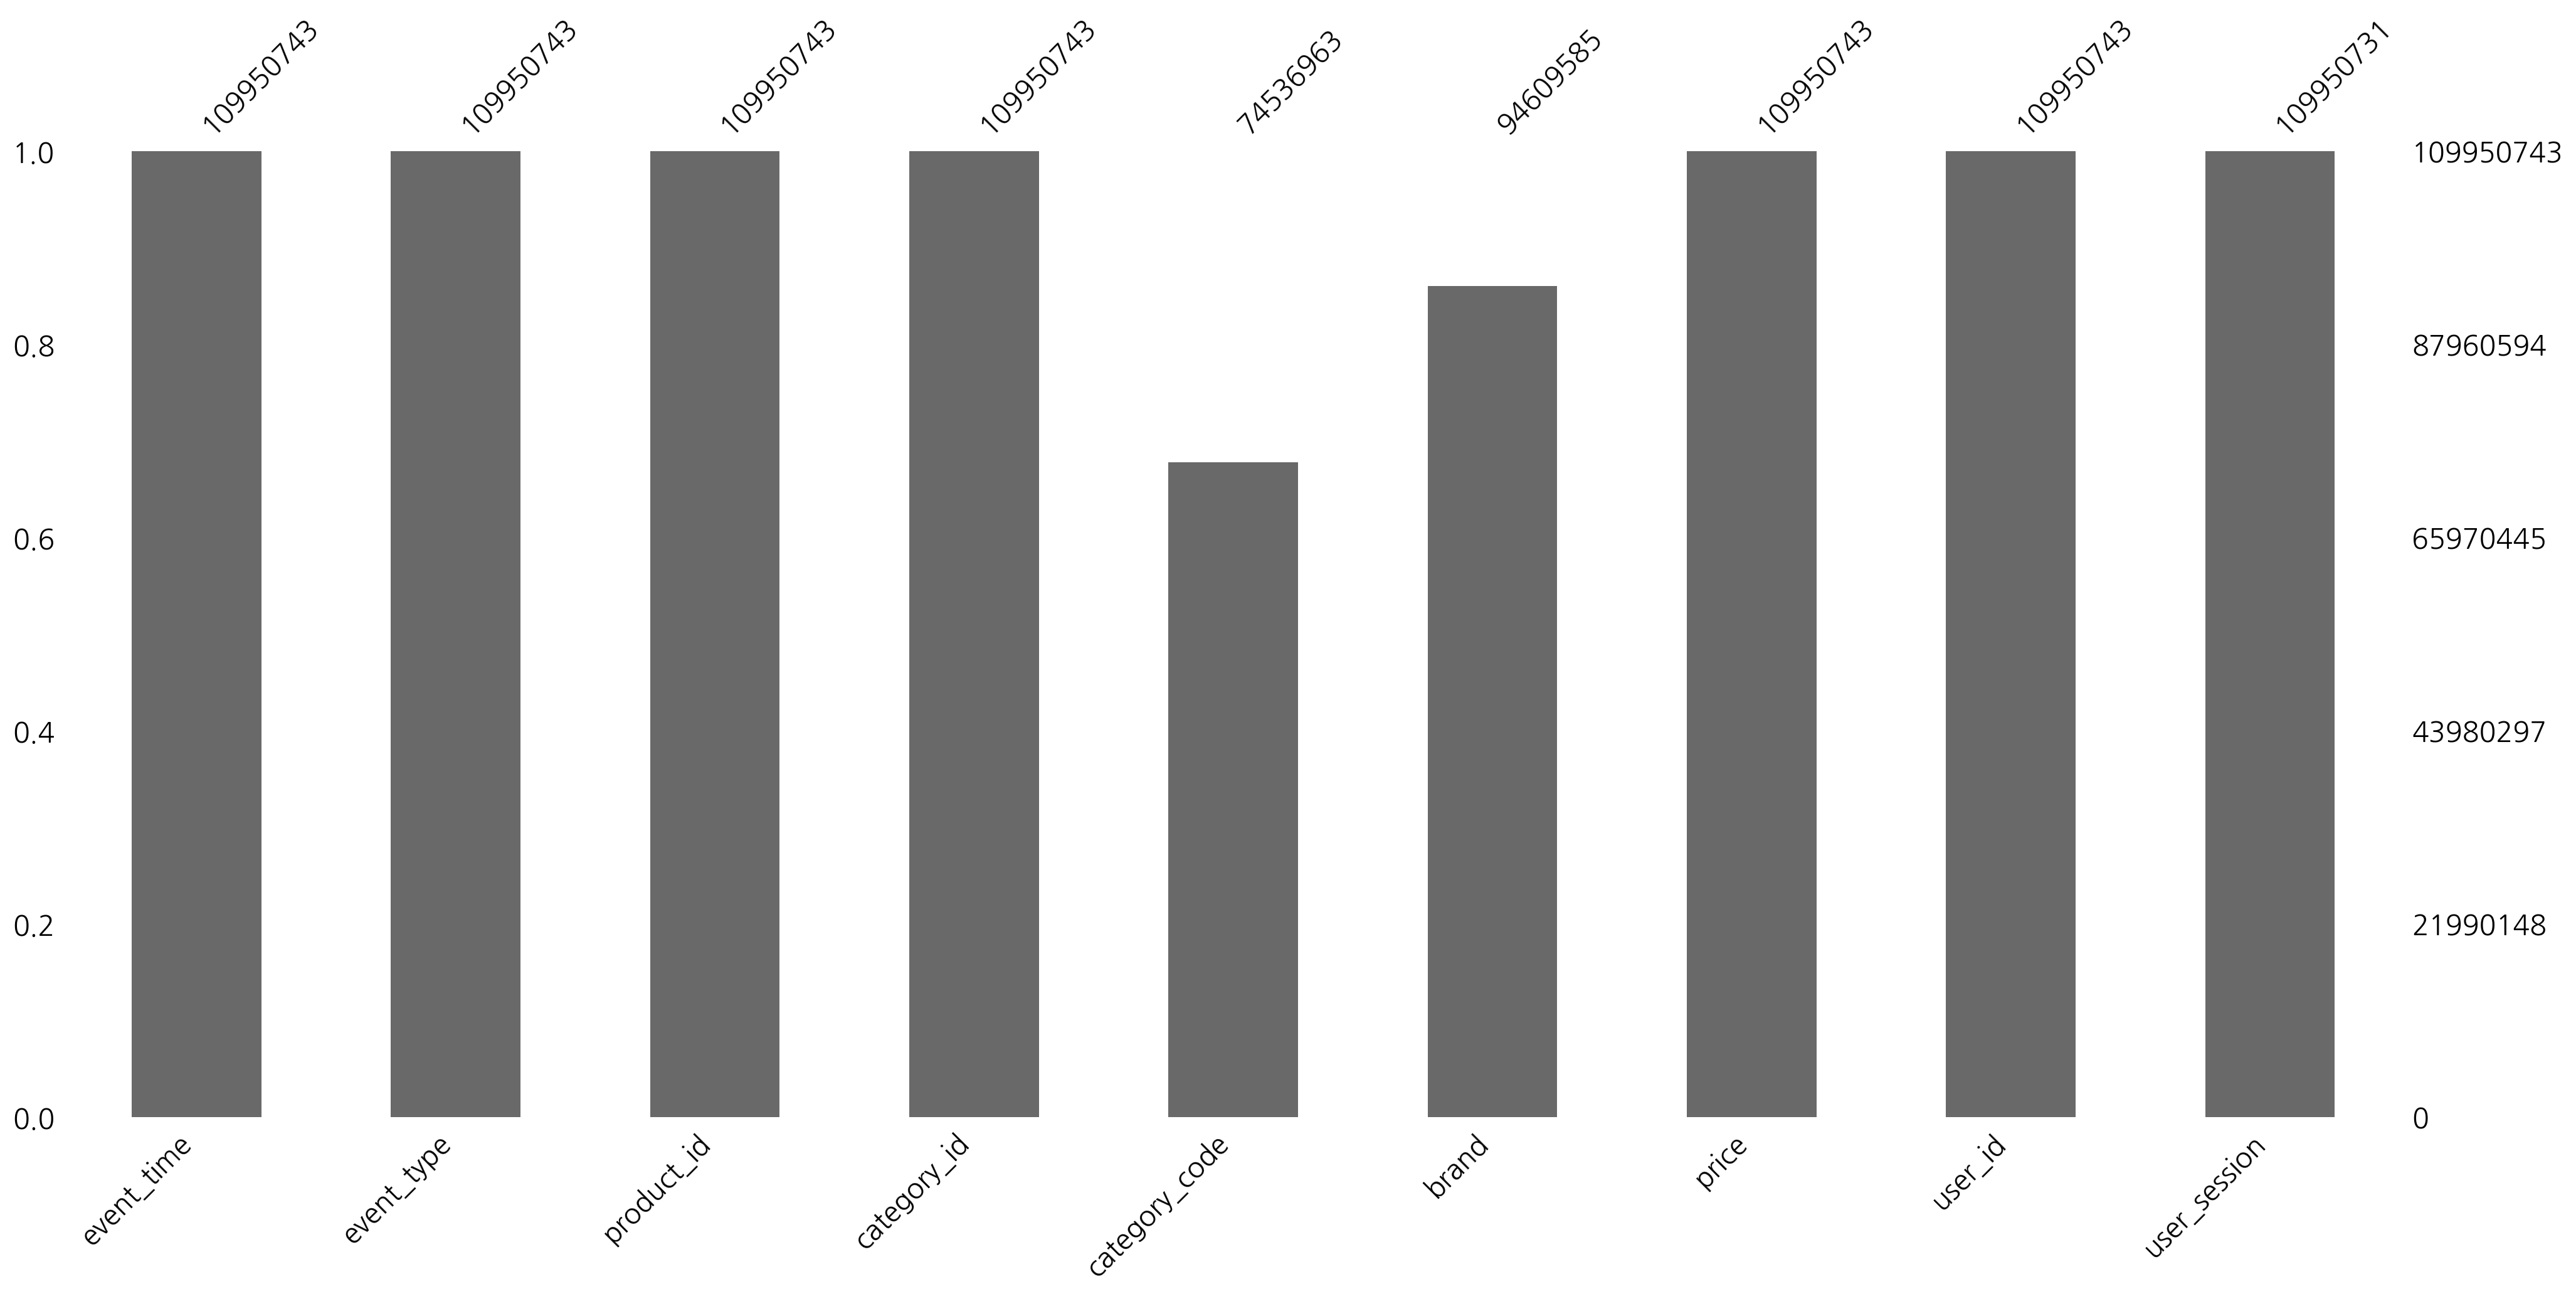

In [5]:
# 결측치 시각화 : category_code, brand, user_session에 결측치가 있음을 확인
msno.bar(df);

In [6]:
df['event_time'] = pd.to_datetime(df['event_time'].str[:-4])
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,None,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


## 유저 세션 분석
- 세션이 많은 유저 중에서 `view`에서 그친 품목
- 세션이 많은 유저 중에서 `purchase`로 이어진 품목

In [12]:
df['user_id'].nunique()

5316649

In [13]:
duration_top10 = df.groupby('user_id').agg({'user_session':'nunique'}).sort_values(by='user_session' ,ascending=False).head(10)
duration_top10

,user_session
user_id,
568778435,22542
569335945,14810
512475445,13474
514649263,5644
568793129,4453
567475167,3617
526731152,3325
568781398,3291
568804062,3290


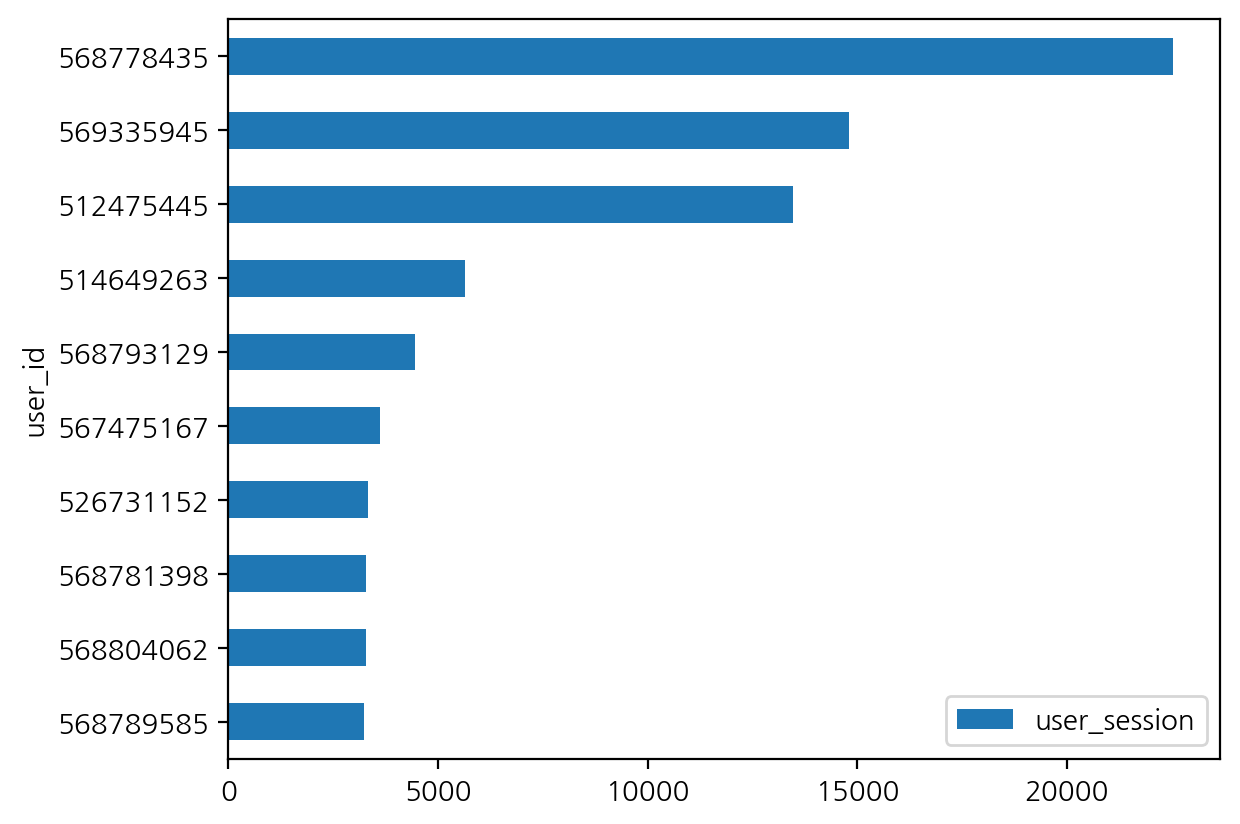

In [14]:
duration_top10.sort_values(by='user_session').plot.barh();

In [15]:
duration_top10.index

Index([568778435, 569335945, 512475445, 514649263, 568793129, 567475167,
       526731152, 568781398, 568804062, 568789585],
      dtype='uint32', name='user_id')

In [16]:
duration_top10_type = df.loc[df['user_id'].isin(duration_top10.index), ['user_id', 'event_type', 'brand', 'category_id', 'category_code']]
duration_top10_type

,user_id,event_type,brand,category_id,category_code
13915,514649263,view,belecoo,2053013560346280633,kids.carriage
46130,514649263,view,belecoo,2053013560346280633,kids.carriage
46599,514649263,view,belecoo,2053013560346280633,kids.carriage
46962,514649263,view,None,2053013560346280633,kids.carriage
58458,514649263,view,belecoo,2053013560346280633,kids.carriage
...,...,...,...,...,...
109872045,569335945,view,babytime,2053013560346280633,kids.carriage
109872102,569335945,view,babytime,2053013560346280633,kids.carriage
109872176,569335945,view,belecoo,2053013560346280633,kids.carriage
109872242,569335945,view,belecoo,2053013560346280633,kids.carriage


In [17]:
duration_top10_intrests = duration_top10_type['category_code'].unique()
list(duration_top10_intrests)

['kids.carriage',
 'appliances.kitchen.refrigerators',
 'auto.accessories.player',
 'electronics.audio.subwoofer',
 'auto.accessories.radar',
 'auto.accessories.videoregister',
 None,
 'auto.accessories.compressor',
 'computers.components.cooler',
 'appliances.environment.air_conditioner',
 'furniture.living_room.chair',
 'electronics.video.tv',
 'appliances.environment.air_heater',
 'appliances.kitchen.hob',
 'appliances.kitchen.oven',
 'appliances.environment.water_heater',
 'appliances.kitchen.microwave',
 'appliances.kitchen.washer',
 'auto.accessories.alarm',
 'furniture.kitchen.chair',
 'furniture.bedroom.bed',
 'appliances.kitchen.hood',
 'appliances.kitchen.dishwasher',
 'computers.peripherals.printer',
 'electronics.smartphone',
 'electronics.tablet',
 'kids.swing',
 'electronics.clocks',
 'kids.toys',
 'electronics.audio.microphone',
 'electronics.audio.headphone',
 'computers.notebook',
 'electronics.audio.acoustic',
 'appliances.kitchen.grill',
 'kids.skates',
 'kids.fmcg.d

In [18]:
for i in duration_top10_intrests:
    print(i, duration_top10_type[duration_top10_type['category_code']==i].value_counts().sum())

kids.carriage 20798
appliances.kitchen.refrigerators 1217
auto.accessories.player 4868
electronics.audio.subwoofer 3227
auto.accessories.radar 1054
auto.accessories.videoregister 3325
None 0
auto.accessories.compressor 108
computers.components.cooler 320
appliances.environment.air_conditioner 250
furniture.living_room.chair 255
electronics.video.tv 1221
appliances.environment.air_heater 87
appliances.kitchen.hob 1178
appliances.kitchen.oven 563
appliances.environment.water_heater 320
appliances.kitchen.microwave 159
appliances.kitchen.washer 471
auto.accessories.alarm 1201
furniture.kitchen.chair 736
furniture.bedroom.bed 11
appliances.kitchen.hood 297
appliances.kitchen.dishwasher 418
computers.peripherals.printer 24
electronics.smartphone 8003
electronics.tablet 608
kids.swing 424
electronics.clocks 650
kids.toys 15
electronics.audio.microphone 4
electronics.audio.headphone 448
computers.notebook 746
electronics.audio.acoustic 162
appliances.kitchen.grill 3
kids.skates 24
kids.fmcg.d

### 대분류명과 소분류명 구분하기

In [19]:
# 첫번째 추출 함수
def extract_first_element(string):
    elements = string.split('.')
    return elements[0]

In [20]:
# 마지막 추출 함수
def extract_last_element(string):
    elements = string.split('.')
    return elements[-1]

In [21]:
# 결측치 제거
df = df.dropna().copy()
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [22]:
# category_code에서 대분류와 소분류로 추출
df['main_category'] = df['category_code'].apply(extract_first_element)
df['sub_category'] = df['category_code'].apply(extract_last_element)
df = df.drop(['category_code', 'category_id'], axis=1).copy()
df.sample(10)

,event_time,event_type,product_id,brand,price,user_id,user_session,main_category,sub_category
24931832,2019-10-19 03:10:44,view,1004835,samsung,224.889999,557734904,5c0d23f2-5894-4f35-8620-031d8d1e3505,electronics,smartphone
104366050,2019-11-27 16:52:09,view,11200364,elenberg,12.840000,515600358,35b88a49-0b6d-4d1d-82c7-96692e27e3f1,appliances,scales
44855415,2019-11-02 14:22:10,view,1801513,haier,514.789978,513081209,ea231bbd-edd4-45e4-9311-a74dd821b53d,electronics,tv
64216255,2019-11-13 07:19:36,view,28720336,reebok,118.150002,528356867,5c37de26-5087-4133-8c75-3dbc265cc47c,apparel,keds
30980915,2019-10-23 07:22:30,view,2500176,hansa,411.829987,551852358,2c5815ec-8737-4bd7-90c6-9a11c3bb069e,appliances,oven
30094926,2019-10-22 14:12:41,view,1004858,samsung,131.529999,553545404,454beb70-85ea-48bd-836e-47cd5612c1c5,electronics,smartphone
76974691,2019-11-16 07:43:11,view,1201448,apple,614.690002,519683228,0772f8f2-7410-42df-b072-d06375516163,electronics,tablet
109363943,2019-11-30 15:00:37,view,1201471,samsung,468.399994,513063826,f586314b-b951-42ce-b66c-39f59bb26230,electronics,tablet
55764528,2019-11-08 18:53:20,view,2800433,haier,283.119995,525774228,a497874f-5fb7-4f79-b5c7-d8289f934d23,appliances,refrigerators
101287869,2019-11-25 19:21:37,view,12600045,bosch,187.130005,514298293,398cc712-801d-41e4-99d6-4bbca9e65975,appliances,grill


In [23]:
df = df[['event_time', 'event_type', 'user_id','user_session', 'brand', 'main_category', 'sub_category', 'product_id', 'price']]
df.columns

Index(['event_time', 'event_type', 'user_id', 'user_session', 'brand',
       'main_category', 'sub_category', 'product_id', 'price'],
      dtype='object')

## 기술통계

In [24]:
# 기술통계
df.describe(include='O')

,user_session,brand,main_category,sub_category
count,68650184,68650184,68650184,68650184
unique,15957931,2044,13,127
top,cfb90a35-9575-495c-b6aa-48ddca2a7a9c,samsung,electronics,smartphone
freq,1075,12892229,39417041,27838899


**기술통계로 알 수 있는 것**
- 가장 많은 관심을 받은 브랜드 : samsung
- 가장 많은 관심을 받은 제품 대분류 : electronics
- 가장 많은 관심을 받은 제품 소분류 : smartphone

## 월별, 요일별, 일별, 시간대별 구매 빈도수 분석

In [25]:
# year, month, day, dayofweek 를 InvoiceDate에서 추출하여 파생변수로 생성합니다.
df['event_m'] = df['event_time'].dt.month
df['event_d'] = df['event_time'].dt.day
df['event_dow'] = df['event_time'].dt.dayofweek
df['event_hm'] = df['event_time'].dt.time
df['event_h'] = df['event_time'].dt.hour
df.sample(2)

,event_time,event_type,user_id,user_session,brand,main_category,sub_category,product_id,price,event_m,event_d,event_dow,event_hm,event_h
33312508,2019-10-24 21:38:16,view,563844998,ee7f25bc-711f-4af4-b4df-a0569fd1a01c,samsung,electronics,smartphone,1004856,131.509995,10,24,3,21:38:16,21
96437344,2019-11-22 17:58:26,view,538718939,7146712f-46bb-415f-b366-511bd8d9bc57,samsung,electronics,tv,1801704,434.369995,11,22,4,17:58:26,17


In [26]:
def change_dow(x):
    dow = [i for i in '월화수목금토일']
    x = dow[x]
    return x

In [27]:
df['event_dow'] = df['event_dow'].map(change_dow).copy()
df.sample(2)

,event_time,event_type,user_id,user_session,brand,main_category,sub_category,product_id,price,event_m,event_d,event_dow,event_hm,event_h
106359186,2019-11-29 01:12:52,view,569625449,0c7e44f0-3fac-4493-a43f-b8bf12dd54eb,apple,electronics,smartphone,1004249,795.099976,11,29,금,01:12:52,1
48458428,2019-11-04 16:55:17,view,548198203,2fbbd85d-2496-4488-91d3-8a82b4a826c0,defender,electronics,headphone,4803412,19.790001,11,4,월,16:55:17,16


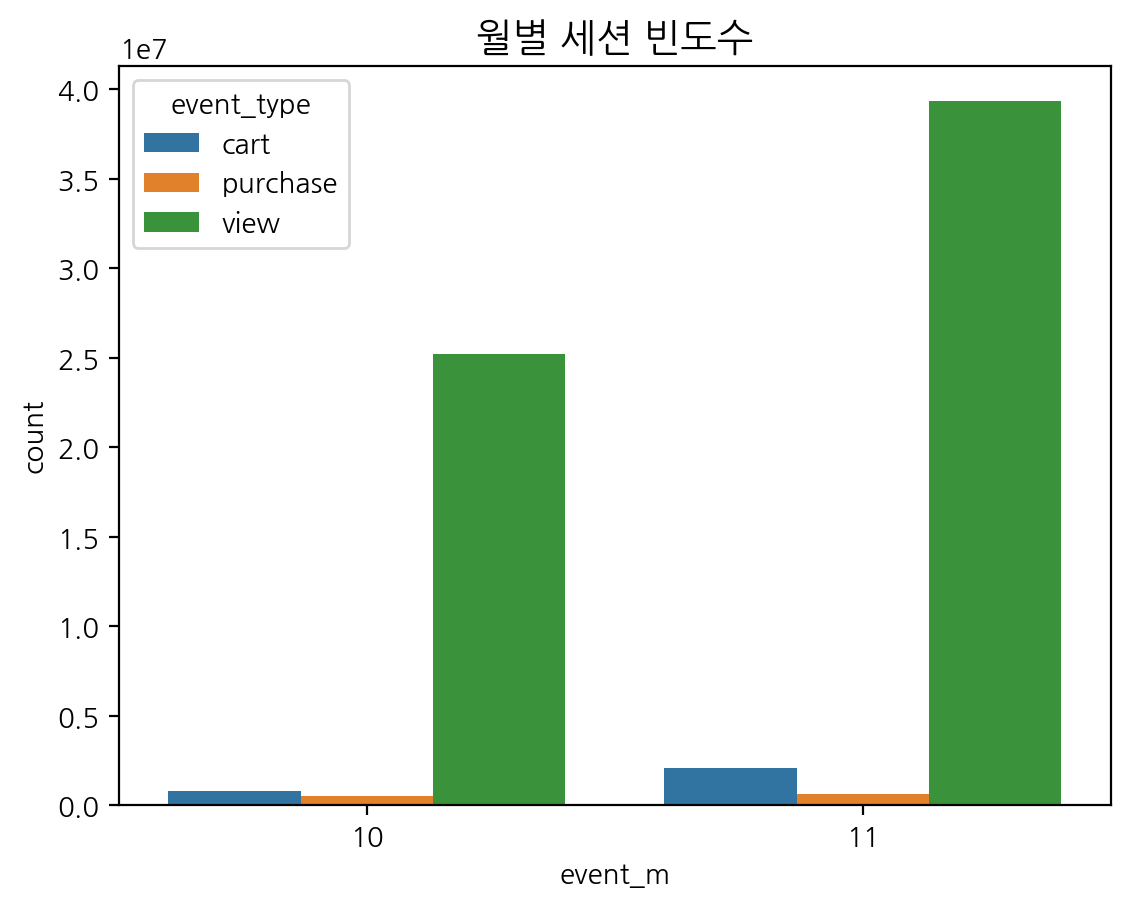

In [28]:
# countplot 으로 월별 세션 빈도수 시각화
sns.countplot(data=df, x='event_m', hue='event_type').set_title('월별 세션 빈도수', fontsize=14);

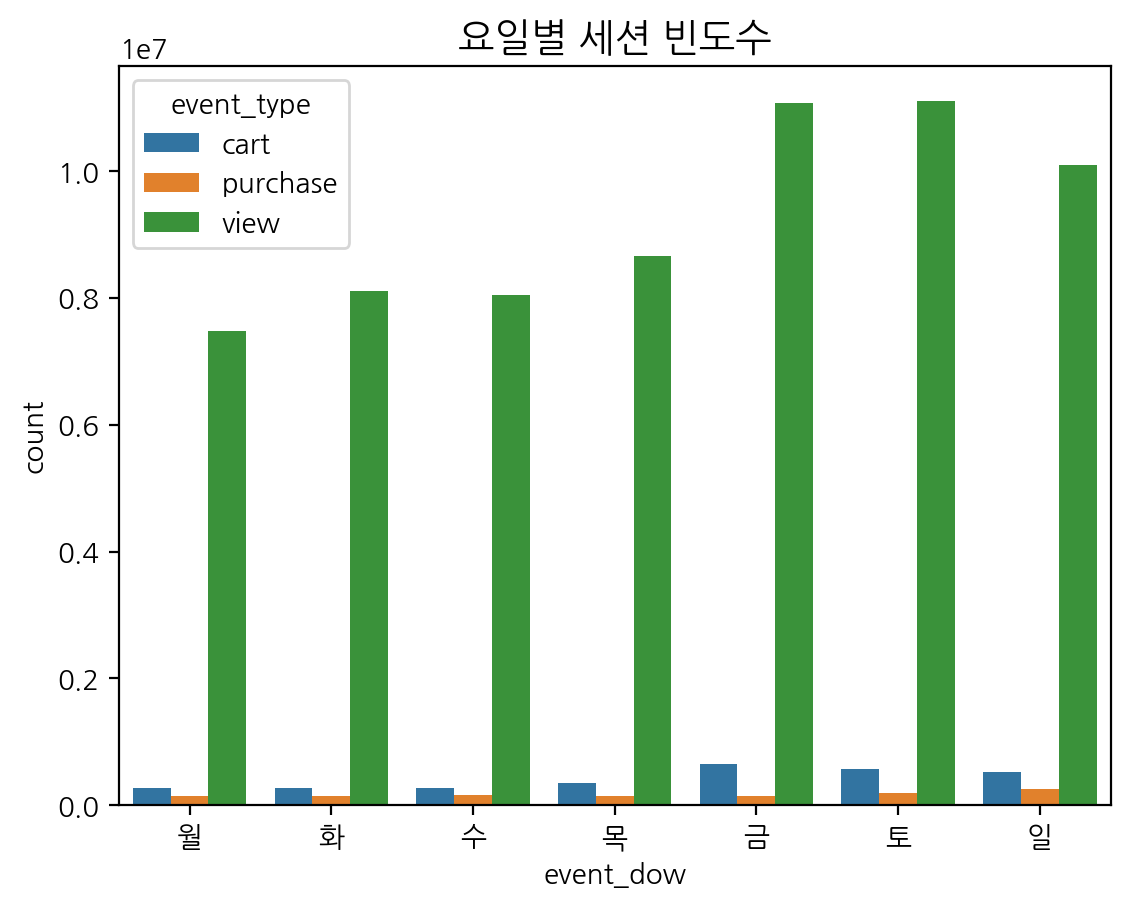

In [29]:
# countplot 으로 요일별 세션 빈도수 시각화
sns.countplot(data=df, x='event_dow', hue='event_type', order='월화수목금토일').set_title('요일별 세션 빈도수', fontsize=14);

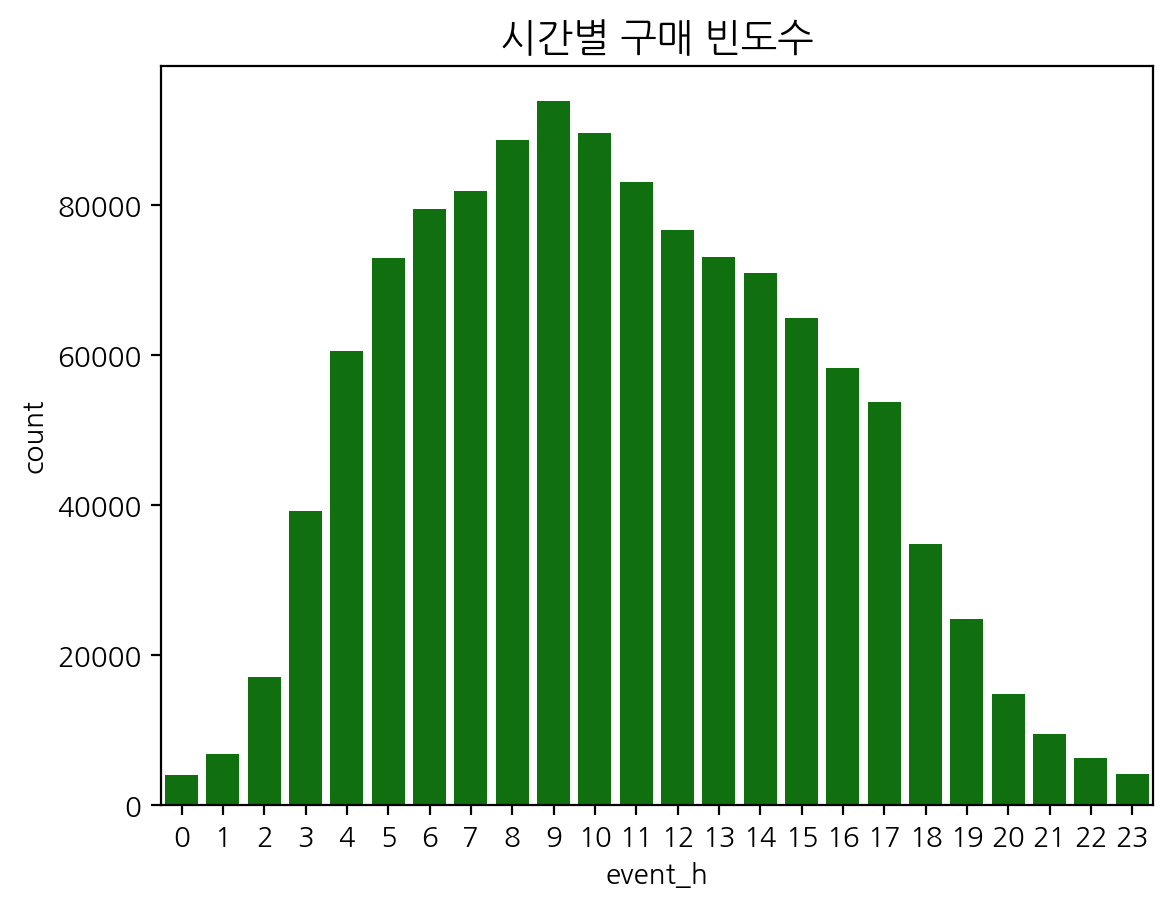

In [30]:
# countplot 으로 시간대별 구매 빈도수 시각화
sns.countplot(data=df[df['event_type']=='purchase'], x='event_h', color='Green').set_title('시간별 구매 빈도수', fontsize=14);

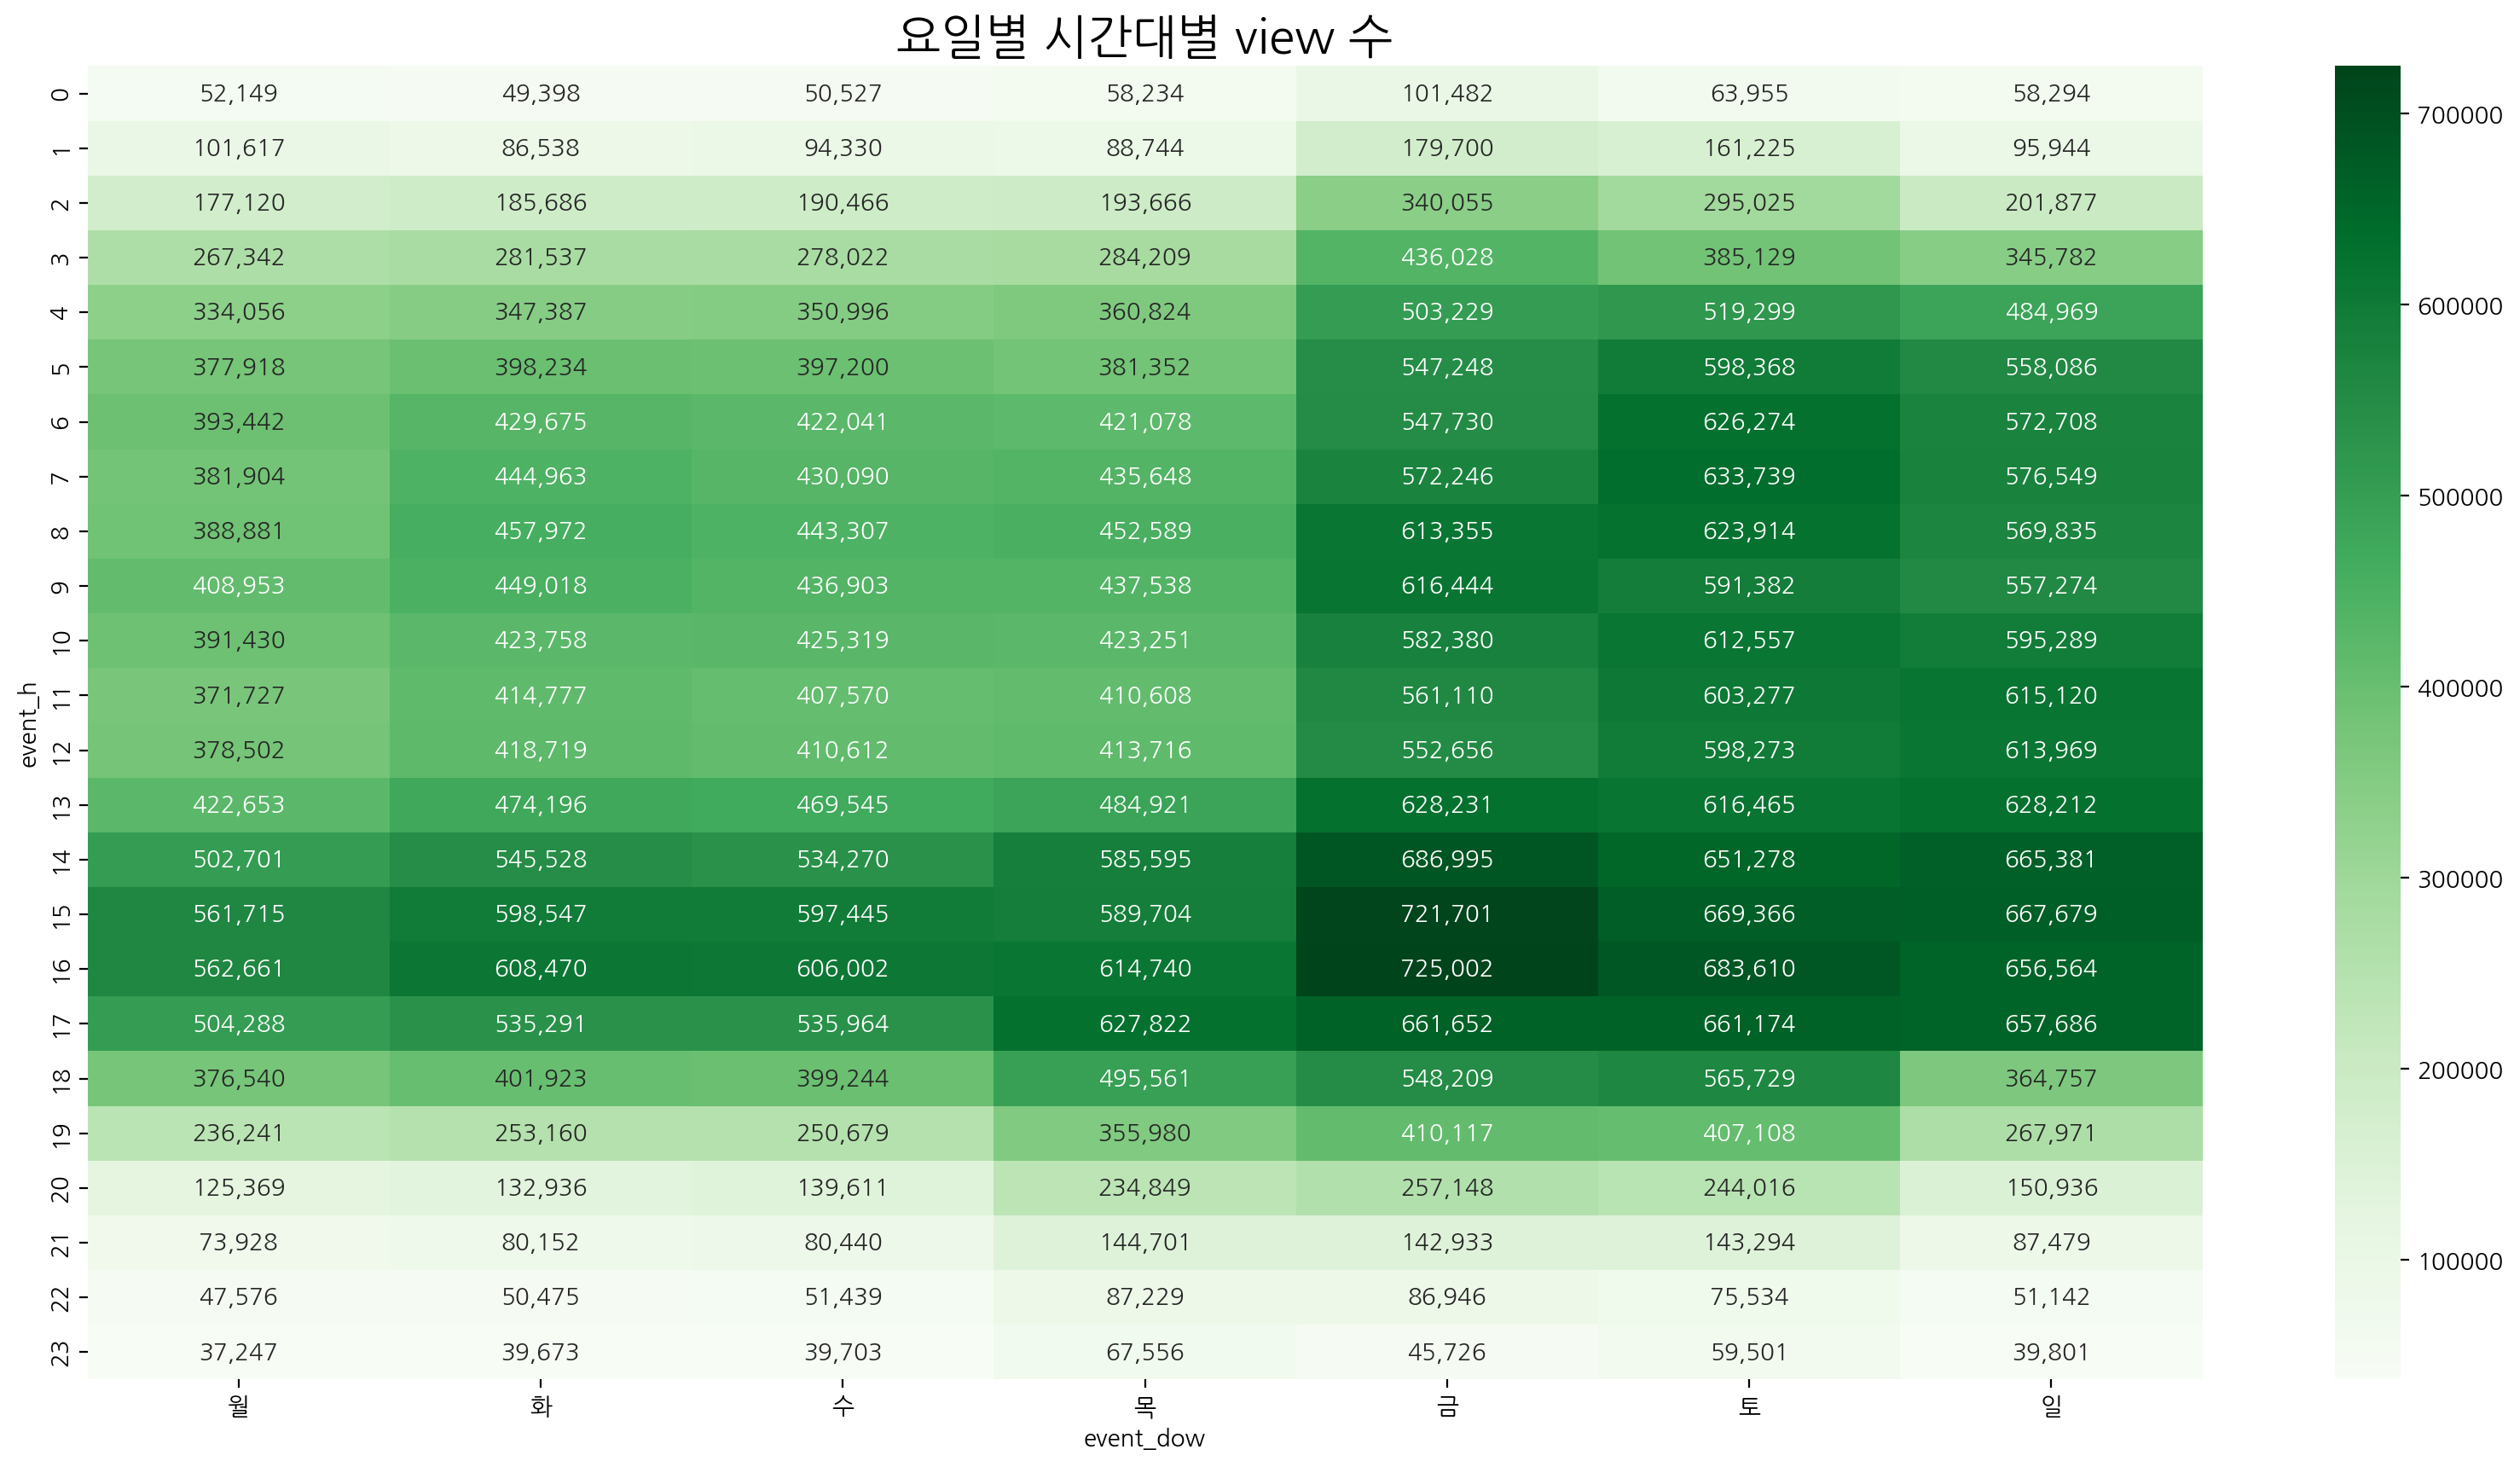

In [31]:
# 시간 요일별 view 빈도수
hour_dow = pd.crosstab(index=df.loc[df['event_type']=='view', 'event_h'], columns=df.loc[df['event_type']=='view', 'event_dow'])
hour_dow = hour_dow[['월', '화', '수', '목', '금', '토', '일']].copy()

plt.figure(figsize=(20, 10))
sns.heatmap(hour_dow, annot=True, fmt=',', cmap='Greens').set_title('요일별 시간대별 view 수', fontsize=20);

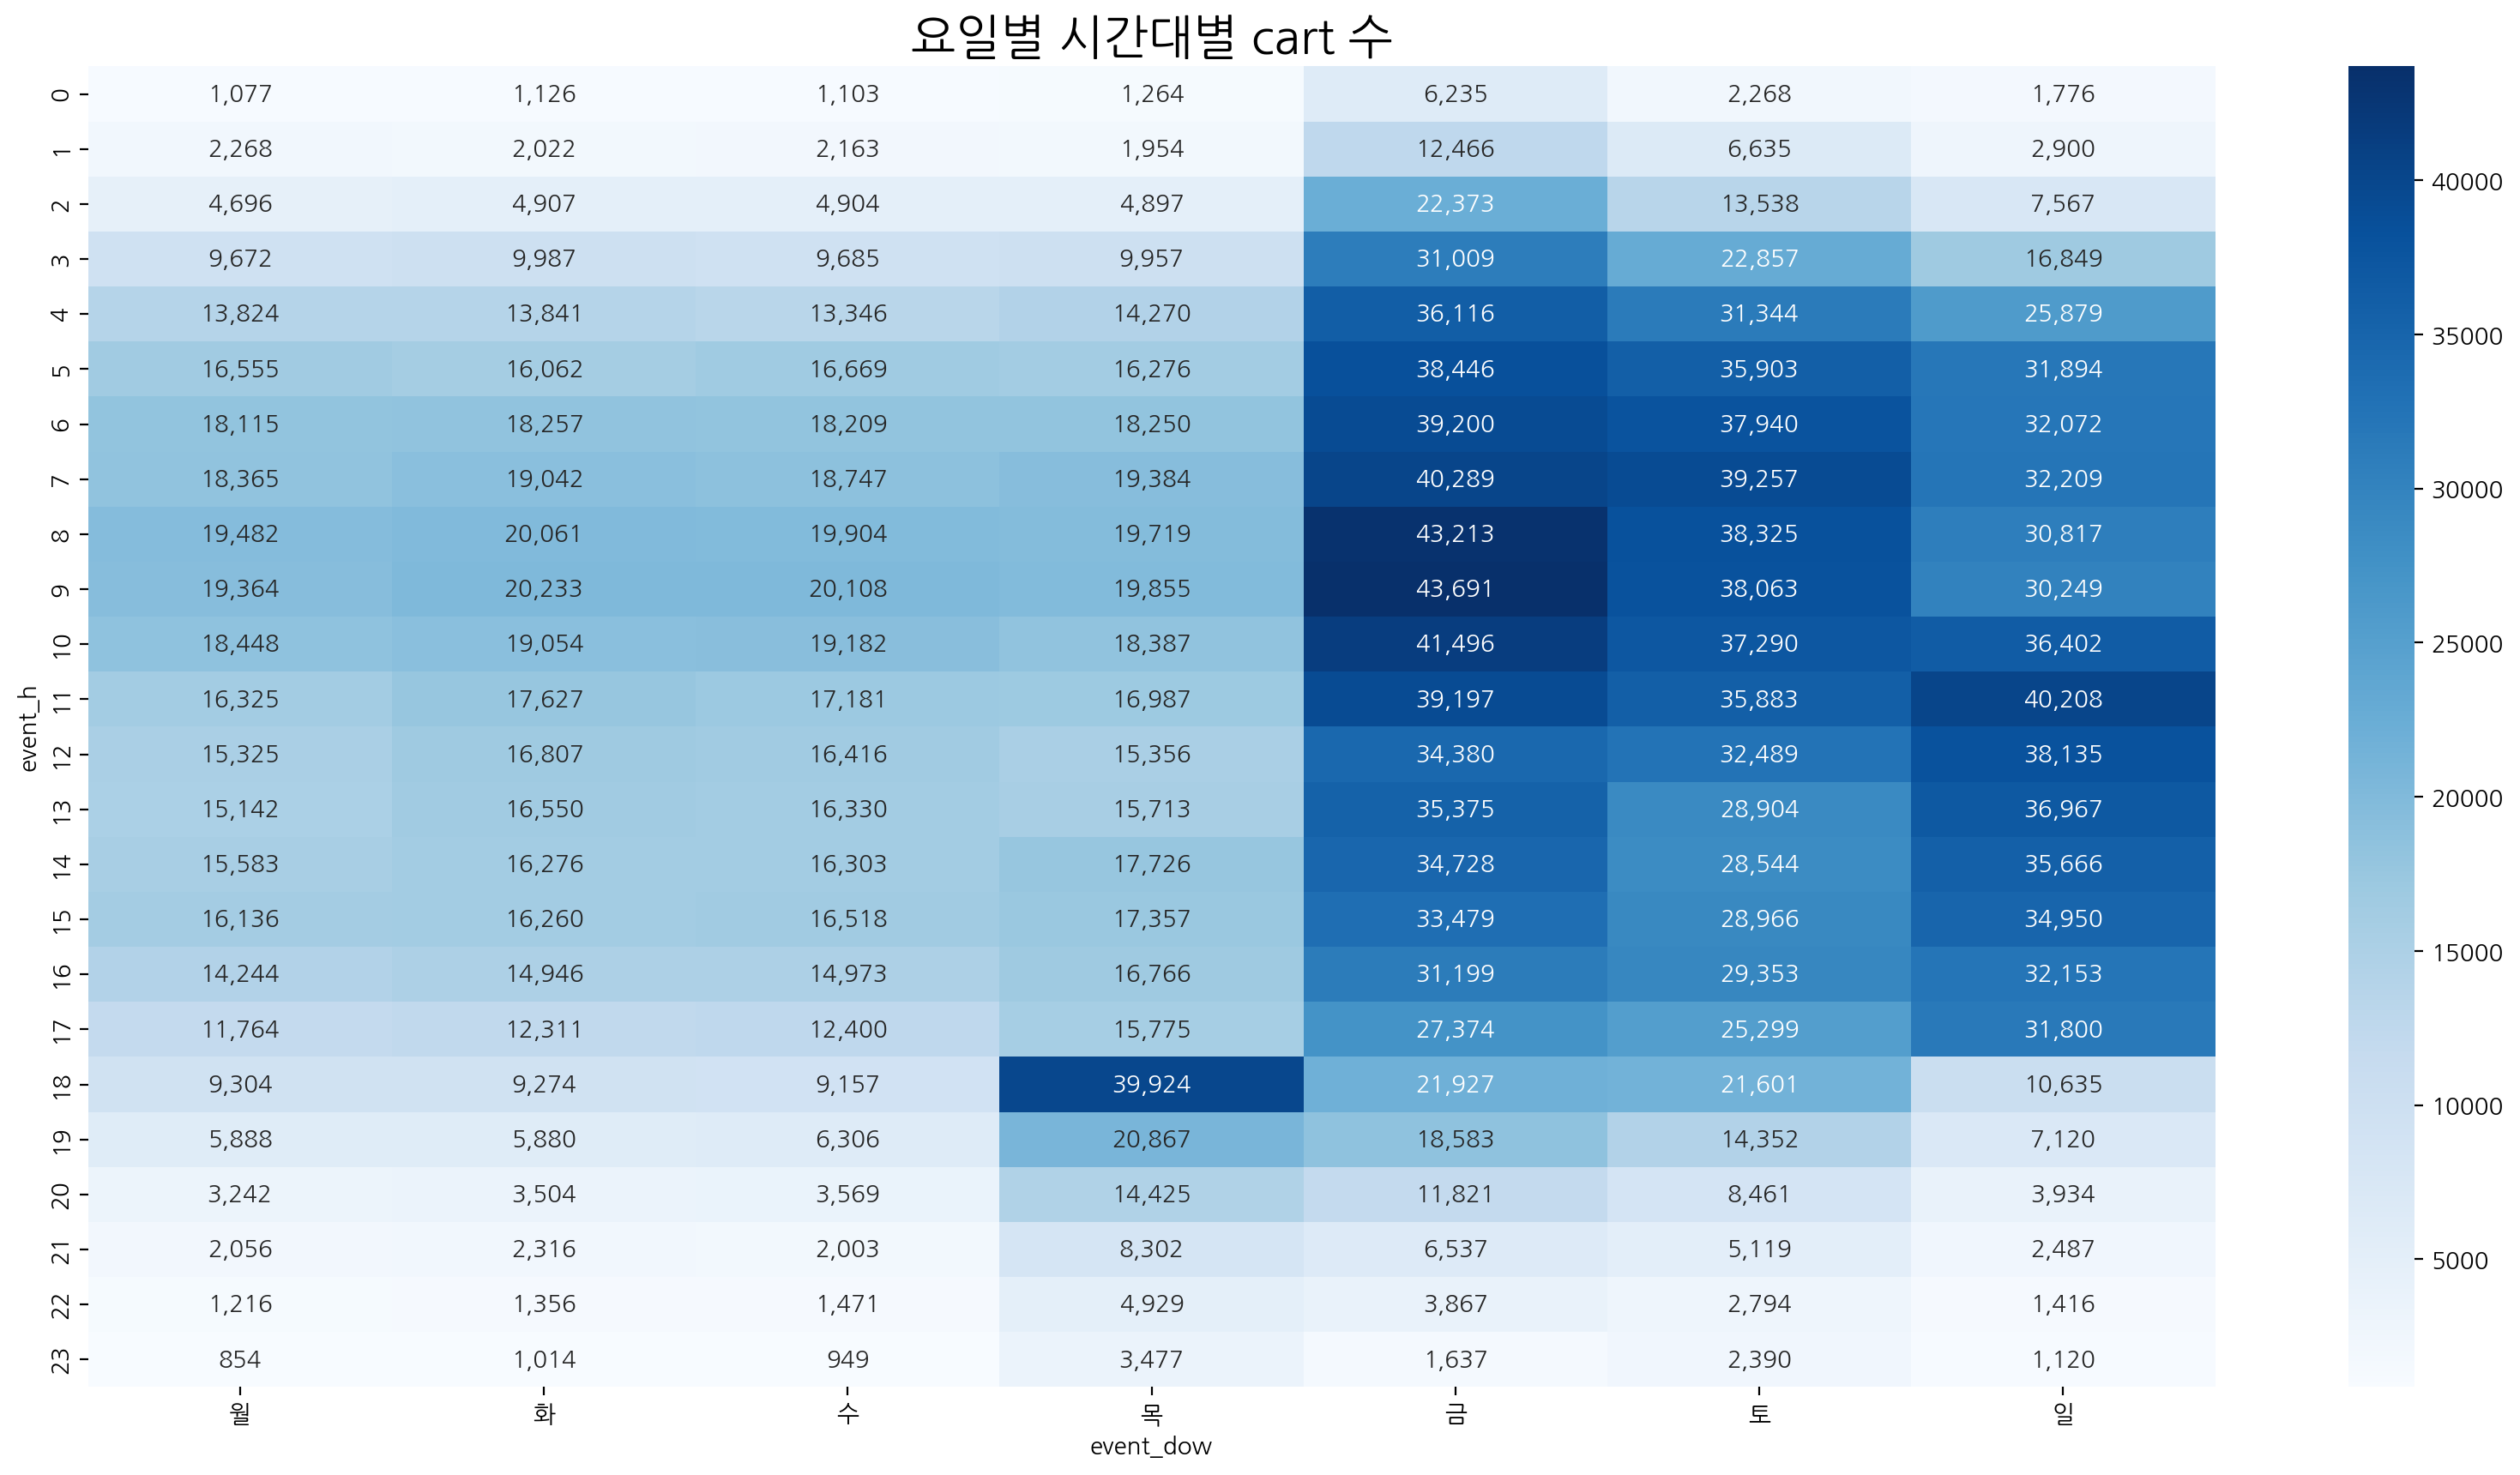

In [32]:
# 시간 요일별 cart 빈도수
hour_dow_cart = pd.crosstab(index=df.loc[df['event_type']=='cart', 'event_h'], columns=df.loc[df['event_type']=='cart', 'event_dow'])
hour_dow_cart = hour_dow_cart[['월', '화', '수', '목', '금', '토', '일']].copy()

plt.figure(figsize=(20, 10))
sns.heatmap(hour_dow_cart, annot=True, fmt=',', cmap='Blues').set_title('요일별 시간대별 cart 수', fontsize=20);

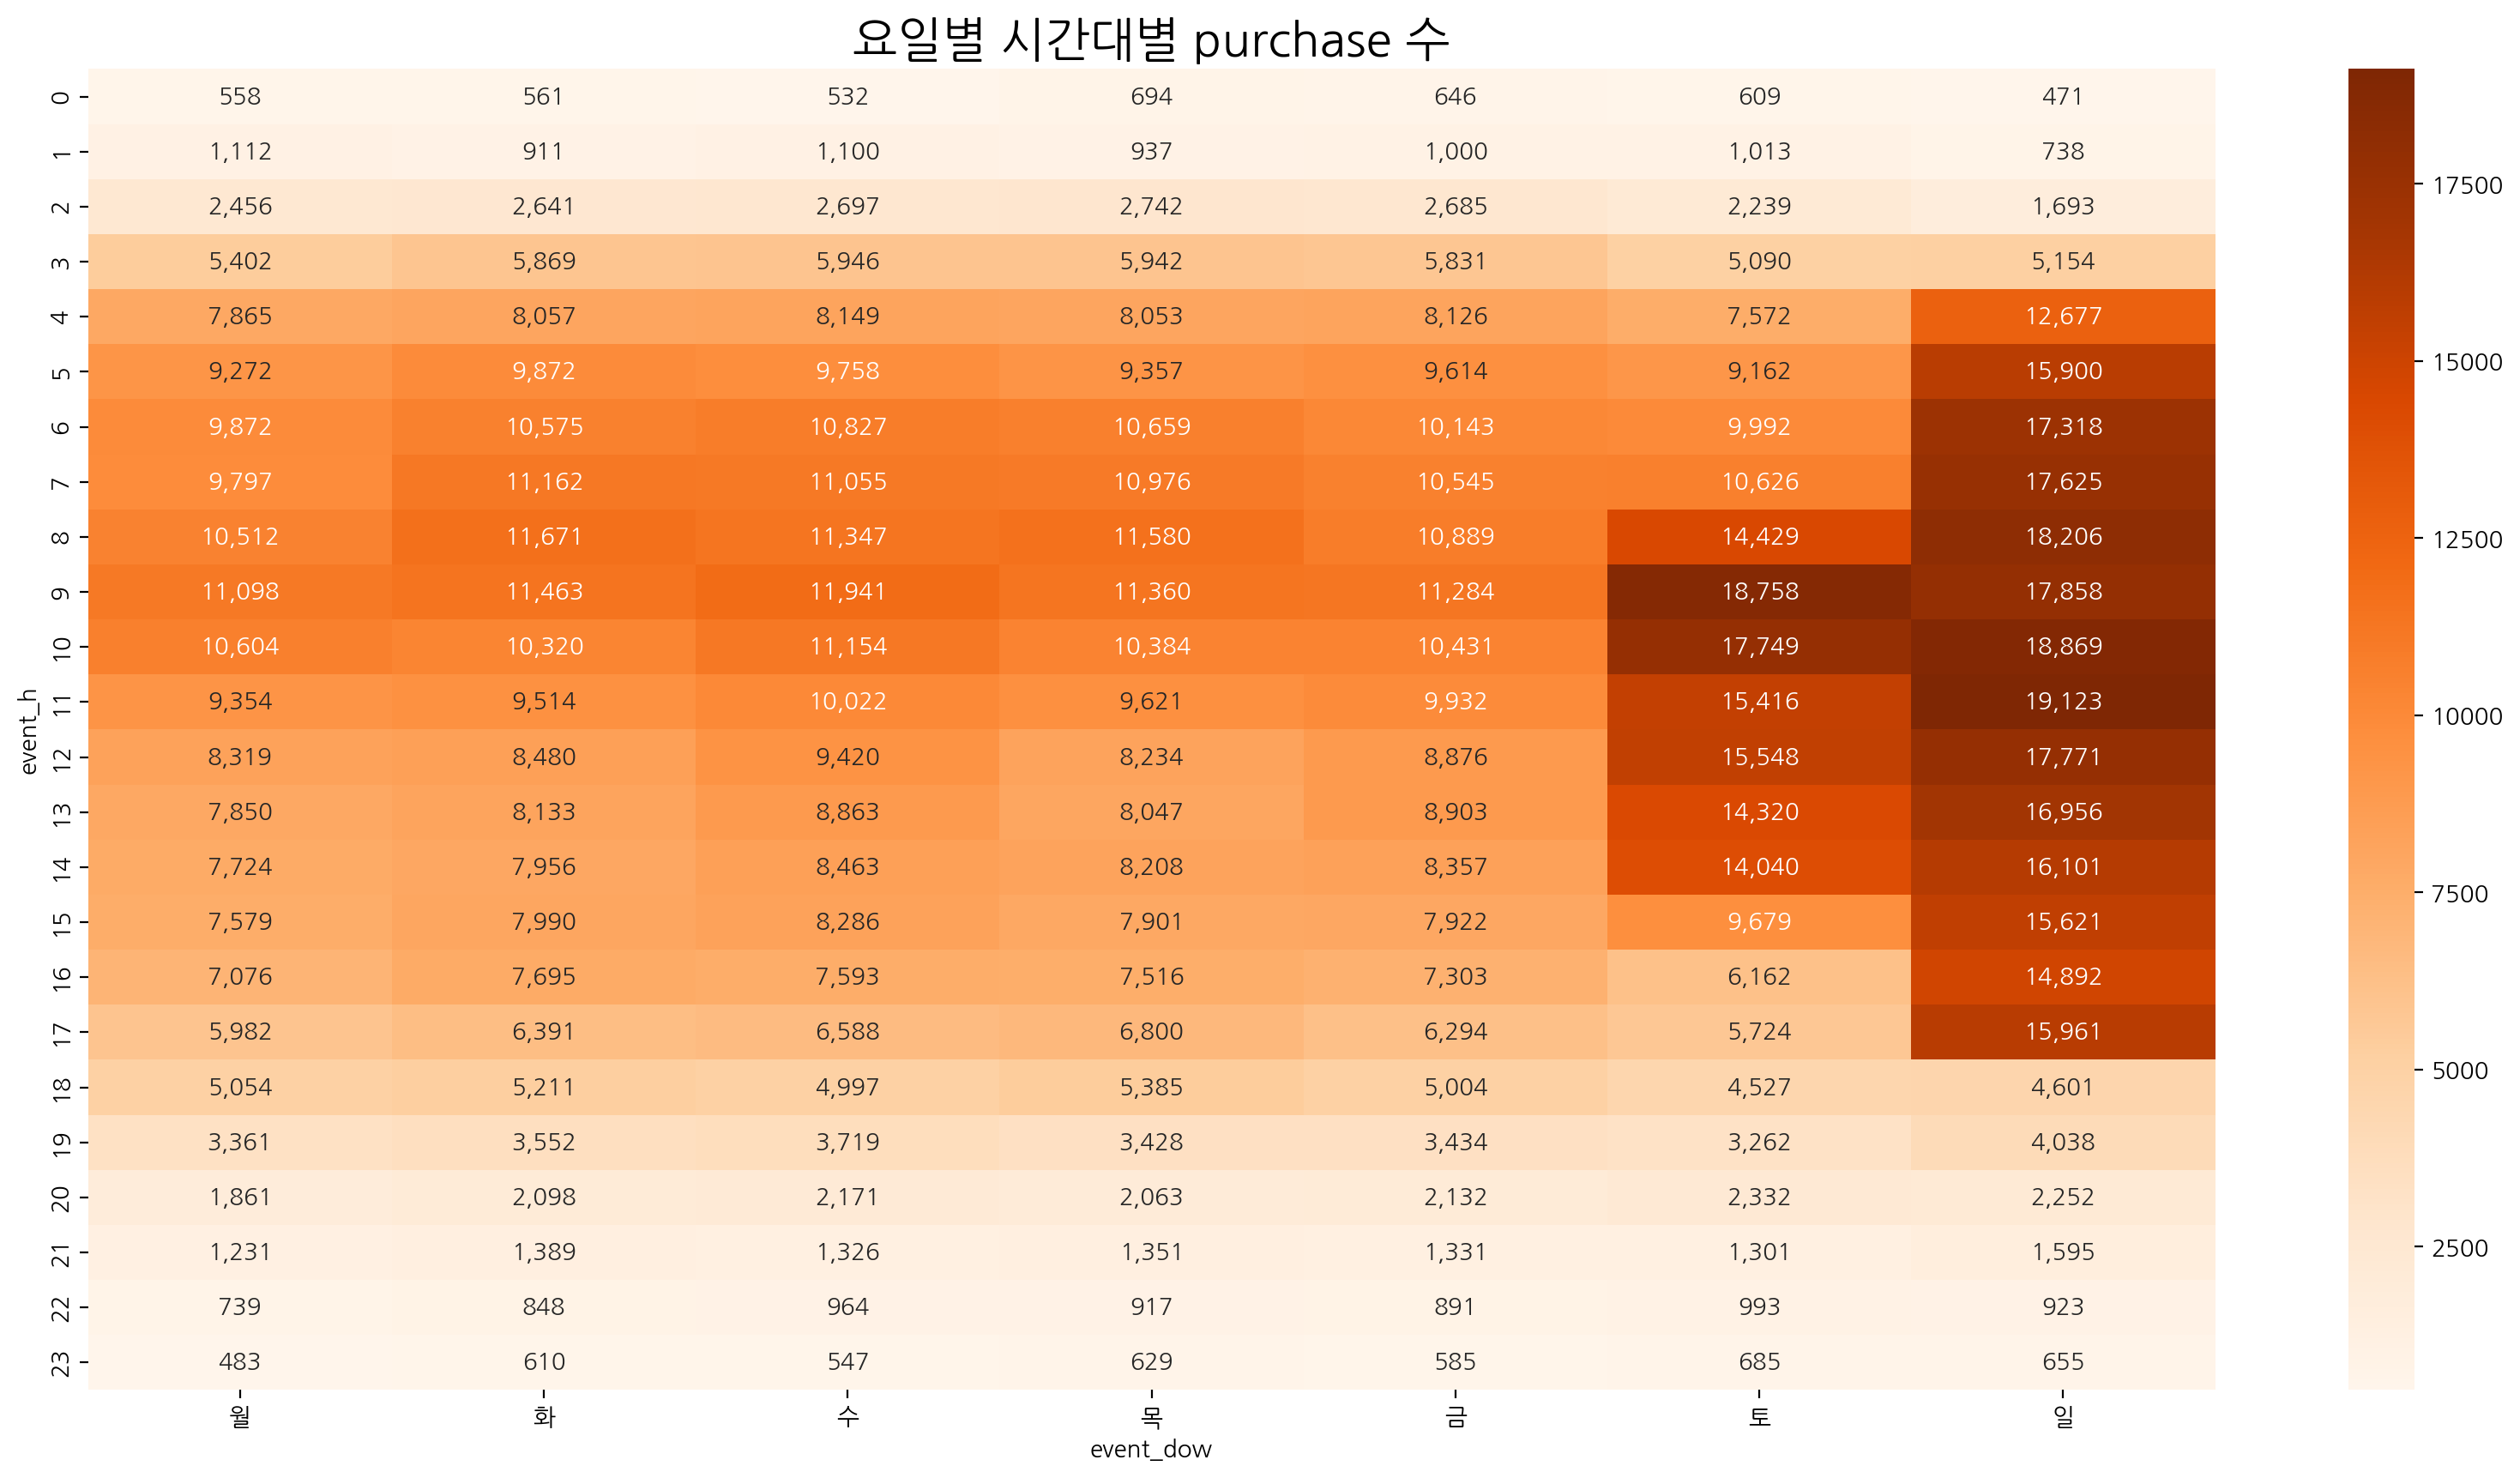

In [33]:
# 시간 요일별 purchase 빈도수
hour_dow_purchase = pd.crosstab(index=df.loc[df['event_type']=='purchase', 'event_h'], columns=df.loc[df['event_type']=='purchase', 'event_dow'])
hour_dow_purchase = hour_dow_purchase[['월', '화', '수', '목', '금', '토', '일']].copy()

plt.figure(figsize=(20, 10))
sns.heatmap(hour_dow_purchase, annot=True, fmt=',', cmap='Oranges').set_title('요일별 시간대별 purchase 수', fontsize=20);

`view`는 금요일 오후 시간에 많이하고, `purchase`는 일요일 오전에 많이 한다.

### ARPU, ARPPU
**ARPU(Average Revenue Per User)**
- ARPU(활성 사용자 1인당 평균 수익) = 매출 / 중복을 제외한 순수 활동 사용자 수

**ARPPU(Average Revenue Per Paying User)**
- ARPPU(유료 사용자 1인당 평균 수익) = 매출 / 중복을 제외한 순수 유료 사용자 수

In [34]:
# ARPPU, ARPU
df_valid = df[df['event_type']=='purchase']
df_valid = df_valid.reset_index(drop=True)
df_valid.head(2)

,event_time,event_type,user_id,user_session,brand,main_category,sub_category,product_id,price,event_m,event_d,event_dow,event_hm,event_h
0,2019-10-01 00:02:14,purchase,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,samsung,electronics,smartphone,1004856,130.759995,10,1,화,00:02:14,0
1,2019-10-01 00:04:37,purchase,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,apple,electronics,smartphone,1002532,642.690002,10,1,화,00:04:37,0


In [35]:
df_arppu = df_valid.groupby('event_m').agg({'price':'sum', 'user_id':'nunique'})
df_arppu

,price,user_id
event_m,,
10,203867744.0,263445
11,241560400.0,330394


In [36]:
df_arppu['ARPPU'] = (df_arppu['price'] / df_arppu['user_id']).round(2)
df_arppu['ARPU'] = (df_arppu['price'] / df['user_id'].nunique()).round(2)
df_arppu

,price,user_id,ARPPU,ARPU
event_m,,,,
10,203867744.0,263445,773.85,48.92
11,241560400.0,330394,731.13,57.96


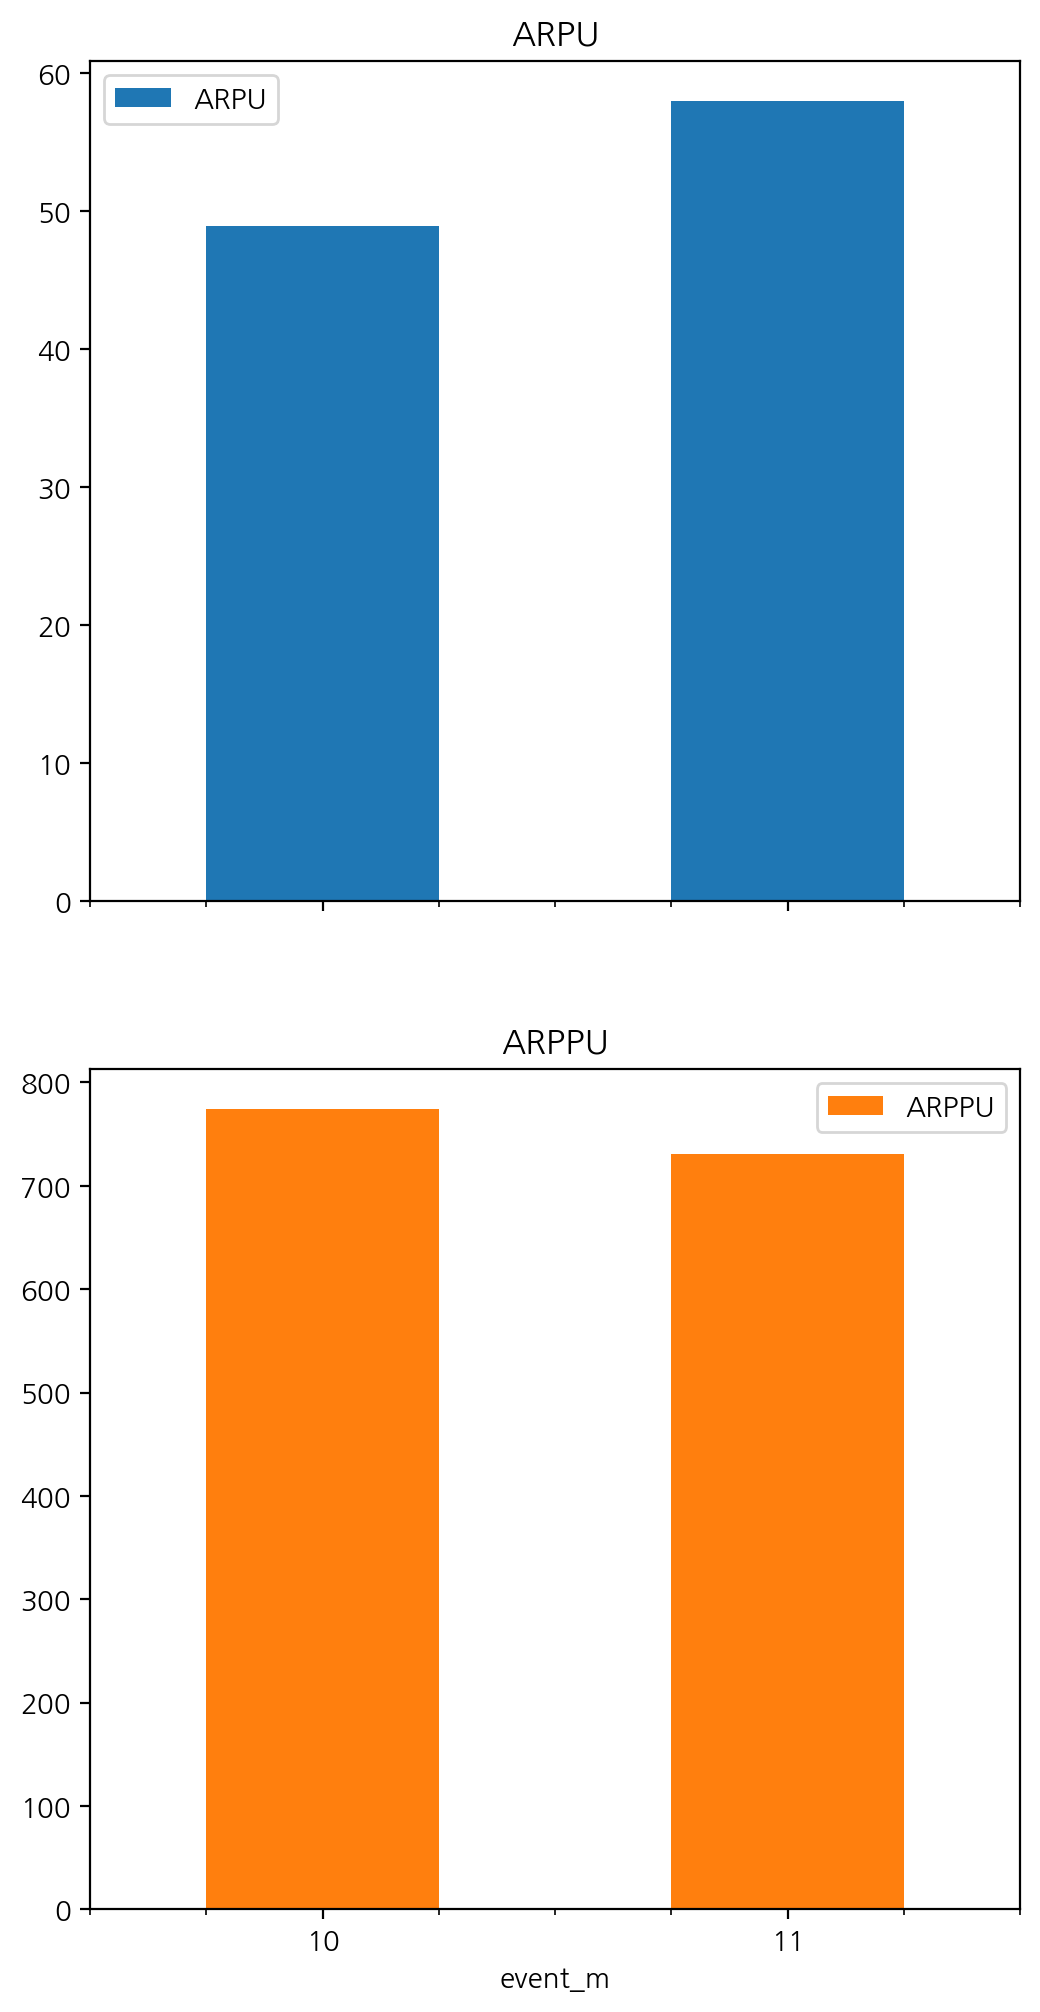

In [37]:
# 시각화
df_arppu[['ARPU', 'ARPPU']].plot(kind='bar', figsize=(6, 12), subplots=True, rot=0);

### MAU, DAU
- **MAU(Monthly Activity User)**
- **DAU(Daily Activity Use)**

In [38]:
df['event_dm'] = df['event_time'].astype(str).str[5:10]
df.head()

,event_time,event_type,user_id,user_session,brand,main_category,sub_category,product_id,price,event_m,event_d,event_dow,event_hm,event_h,event_dm
1,2019-10-01 00:00:00,view,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,aqua,appliances,water_heater,3900821,33.200001,10,1,화,00:00:00,0,10-01
3,2019-10-01 00:00:01,view,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,lenovo,computers,notebook,1307067,251.740005,10,1,화,00:00:01,0,10-01
4,2019-10-01 00:00:04,view,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,apple,electronics,smartphone,1004237,1081.979980,10,1,화,00:00:04,0,10-01
5,2019-10-01 00:00:05,view,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,pulser,computers,desktop,1480613,908.619995,10,1,화,00:00:05,0,10-01
8,2019-10-01 00:00:10,view,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,baden,apparel,keds,28719074,102.709999,10,1,화,00:00:10,0,10-01


In [39]:
dau = df.groupby('event_dm').agg({'user_id':'nunique'})
dau

,user_id
event_dm,
10-01,137834
10-02,134570
10-03,126987
10-04,156639
10-05,141008
...,...
11-26,178153
11-27,181897
11-28,182291


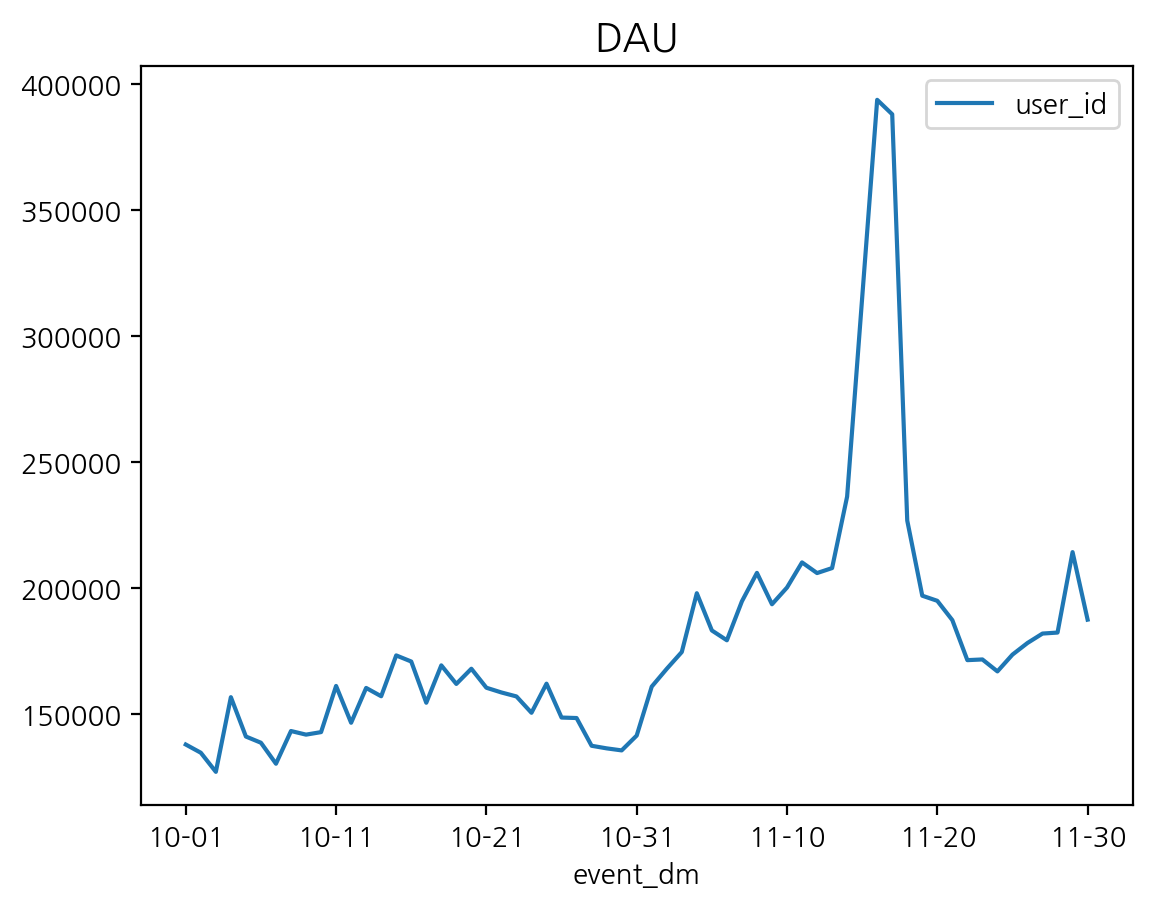

In [40]:
dau.plot().set_title('DAU', fontsize=14);

In [41]:
mau = df.groupby('event_m').agg({'user_id':'nunique'})
mau

,user_id
event_m,
10,2323036
11,2862935


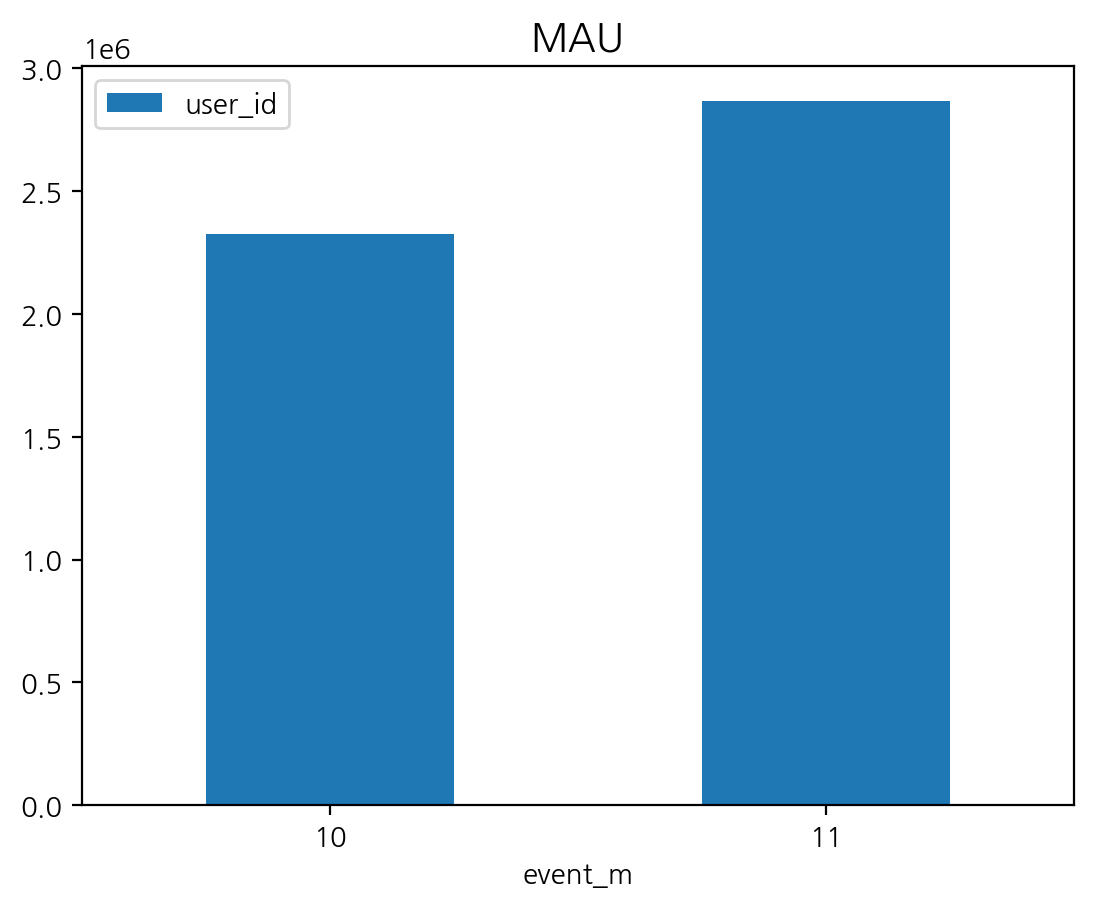

In [42]:
mau.plot.bar(rot=0).set_title('MAU', fontsize=14);

### 코호트 분석(주별)

In [43]:
df.loc[(df['event_time'] >= '2019-10-01') & (df['event_time'] < '2019-10-08'), 'weekfirst'] = '2019-10-01'
df.loc[(df['event_time'] >= '2019-10-08') & (df['event_time'] < '2019-10-15'), 'weekfirst'] = '2019-10-08'
df.loc[(df['event_time'] >= '2019-10-15') & (df['event_time'] < '2019-10-22'), 'weekfirst'] = '2019-10-15'
df.loc[(df['event_time'] >= '2019-10-22') & (df['event_time'] < '2019-10-29'), 'weekfirst'] = '2019-10-22'
df.loc[(df['event_time'] >= '2019-10-29') & (df['event_time'] < '2019-11-05'), 'weekfirst'] = '2019-10-29'
df.loc[(df['event_time'] >= '2019-11-05') & (df['event_time'] < '2019-11-12'), 'weekfirst'] = '2019-11-05'
df.loc[(df['event_time'] >= '2019-11-12') & (df['event_time'] < '2019-11-19'), 'weekfirst'] = '2019-11-12'
df.loc[(df['event_time'] >= '2019-11-19') & (df['event_time'] < '2019-11-26'), 'weekfirst'] = '2019-11-19'
df.loc[(df['event_time'] >= '2019-11-26') & (df['event_time'] < '2019-12-01'), 'weekfirst'] = '2019-11-26'
df

,event_time,event_type,user_id,user_session,brand,main_category,sub_category,product_id,price,event_m,event_d,event_dow,event_hm,event_h,event_dm,weekfirst
1,2019-10-01 00:00:00,view,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,aqua,appliances,water_heater,3900821,33.200001,10,1,화,00:00:00,0,10-01,2019-10-01
3,2019-10-01 00:00:01,view,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,lenovo,computers,notebook,1307067,251.740005,10,1,화,00:00:01,0,10-01,2019-10-01
4,2019-10-01 00:00:04,view,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,apple,electronics,smartphone,1004237,1081.979980,10,1,화,00:00:04,0,10-01,2019-10-01
5,2019-10-01 00:00:05,view,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,pulser,computers,desktop,1480613,908.619995,10,1,화,00:00:05,0,10-01,2019-10-01
8,2019-10-01 00:00:10,view,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,baden,apparel,keds,28719074,102.709999,10,1,화,00:00:10,0,10-01,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109950736,2019-11-30 23:59:57,view,562661595,7165dc28-9cba-40a0-9ed8-76fd909ccb3b,bosch,construction,drill,12301059,266.160004,11,30,토,23:59:57,23,11-30,2019-11-26
109950739,2019-11-30 23:59:58,view,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359,baden,apparel,shoes,28719425,62.810001,11,30,토,23:59:58,23,11-30,2019-11-26
109950740,2019-11-30 23:59:59,view,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,samsung,electronics,smartphone,1004833,167.029999,11,30,토,23:59:59,23,11-30,2019-11-26
109950741,2019-11-30 23:59:59,view,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0,samsung,appliances,refrigerators,2701706,566.270020,11,30,토,23:59:59,23,11-30,2019-11-26


In [44]:
df['weekfirst'] = pd.to_datetime(df['weekfirst'])
df.sample(5)

,event_time,event_type,user_id,user_session,brand,main_category,sub_category,product_id,price,event_m,event_d,event_dow,event_hm,event_h,event_dm,weekfirst
13215158,2019-10-11 07:18:28,view,516976138,46791bc9-ab5b-40b0-939b-3205ac14c17c,samsung,appliances,vacuum,3701095,77.199997,10,11,금,07:18:28,7,10-11,2019-10-08
4608894,2019-10-04 15:45:19,view,516348457,f053e46f-bafe-46a0-a7bb-a40afb994334,lenovo,computers,notebook,1307067,252.229996,10,4,금,15:45:19,15,10-04,2019-10-01
91523599,2019-11-19 18:22:40,view,514346814,8649514b-b4b0-4414-9b8f-9e08fd562665,tefal,appliances,iron,3800979,61.750000,11,19,화,18:22:40,18,11-19,2019-11-19
18010842,2019-10-14 09:47:29,view,521410946,f8554fe1-f267-2471-deec-5b712f16ee26,apple,electronics,smartphone,1002633,358.570007,10,14,월,09:47:29,9,10-14,2019-10-08
77549119,2019-11-16 09:16:05,view,527969378,b16ab99c-59f7-47ca-bf9f-5ea7fd012ce5,cersanit,furniture,bath,13600070,117.889999,11,16,토,09:16:05,9,11-16,2019-11-12


In [45]:
df_n = df[['user_id', 'event_time', 'weekfirst']].copy()
df_n['eventdatemin'] = df_n.groupby('user_id')['weekfirst'].transform('min')
df_n.sample(20)

,user_id,event_time,weekfirst,eventdatemin
55691774,523326113,2019-11-08 18:08:27,2019-11-05,2019-10-08
24504352,561633931,2019-10-18 16:17:51,2019-10-15,2019-10-15
20355920,512875478,2019-10-15 19:09:43,2019-10-15,2019-10-01
10935842,513248444,2019-10-09 12:35:15,2019-10-08,2019-10-01
21075536,515528336,2019-10-16 10:16:23,2019-10-15,2019-10-15
85225753,526116161,2019-11-17 12:38:27,2019-11-12,2019-10-08
104706810,522385124,2019-11-28 01:40:24,2019-11-26,2019-10-08
27324767,544733792,2019-10-20 14:57:28,2019-10-15,2019-10-15
89812533,566219558,2019-11-18 18:46:39,2019-11-12,2019-10-29
54591413,568867113,2019-11-08 08:38:35,2019-11-05,2019-11-05


In [46]:
week_diff = (df_n['weekfirst'] - df_n['eventdatemin']).dt.days // 7
week_diff

1            0
3            0
4            0
5            0
8            0
            ..
109950736    2
109950739    8
109950740    8
109950741    4
109950742    0
Length: 68650184, dtype: int64

In [47]:
df_n['cohortindex'] = week_diff + 1
df_n['cohortindex'].value_counts()

cohortindex
1    27078720
2     9132702
3     7006732
7     5750400
4     5649773
5     5415443
6     5366829
8     2103132
9     1146453
Name: count, dtype: int64

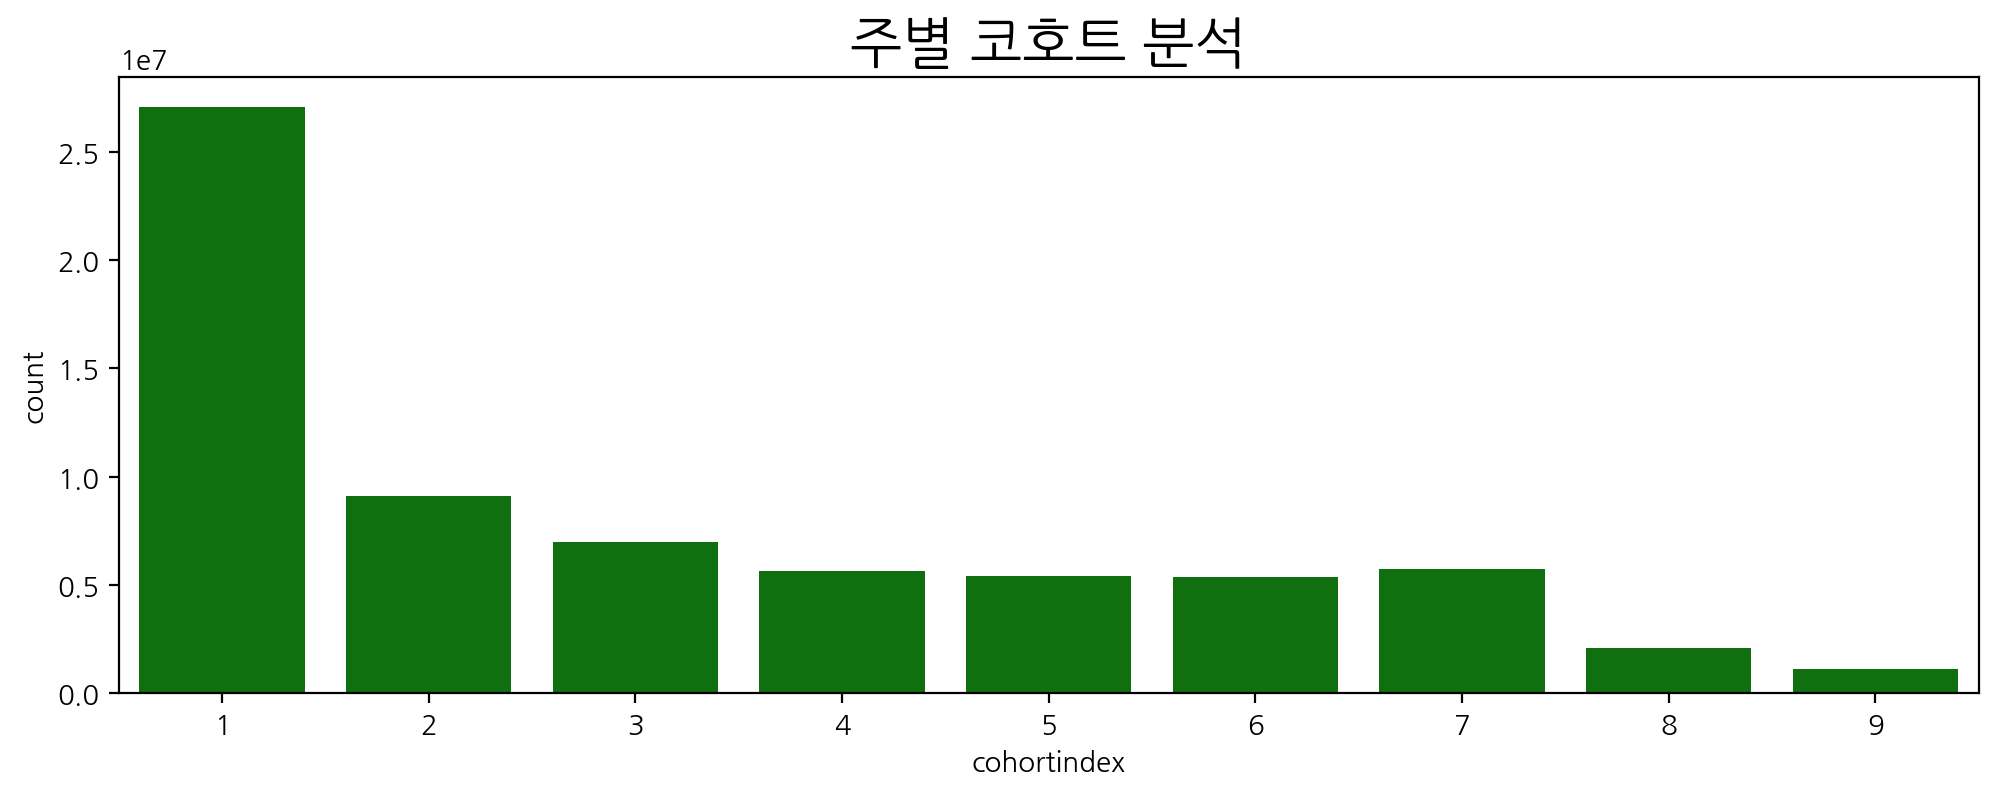

In [48]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_n, x='cohortindex', color='Green').set_title('주별 코호트 분석', fontsize=20);

In [49]:
# 잔존 빈도 구하기
cohort_count = df_n.groupby(['eventdatemin', 'cohortindex'])['user_id'].nunique().unstack()
cohort_count

cohortindex,1,2,3,4,5,6,7,8,9
eventdatemin,,,,,,,,,
2019-10-01,711659.0,223179.0,200869.0,167374.0,168498.0,174813.0,205012.0,136007.0,115124.0
2019-10-08,538720.0,138311.0,106044.0,103743.0,111176.0,133393.0,83034.0,70395.0,NaN
2019-10-15,507796.0,100284.0,85768.0,90333.0,107262.0,66808.0,54180.0,NaN,NaN
2019-10-22,417649.0,78393.0,70767.0,79568.0,51397.0,40258.0,NaN,NaN,NaN
2019-10-29,384079.0,80566.0,82891.0,49183.0,38140.0,NaN,NaN,NaN,NaN
2019-11-05,463060.0,115503.0,63543.0,47324.0,NaN,NaN,NaN,NaN,NaN
2019-11-12,511067.0,93071.0,62199.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-19,381893.0,50957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26,251750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


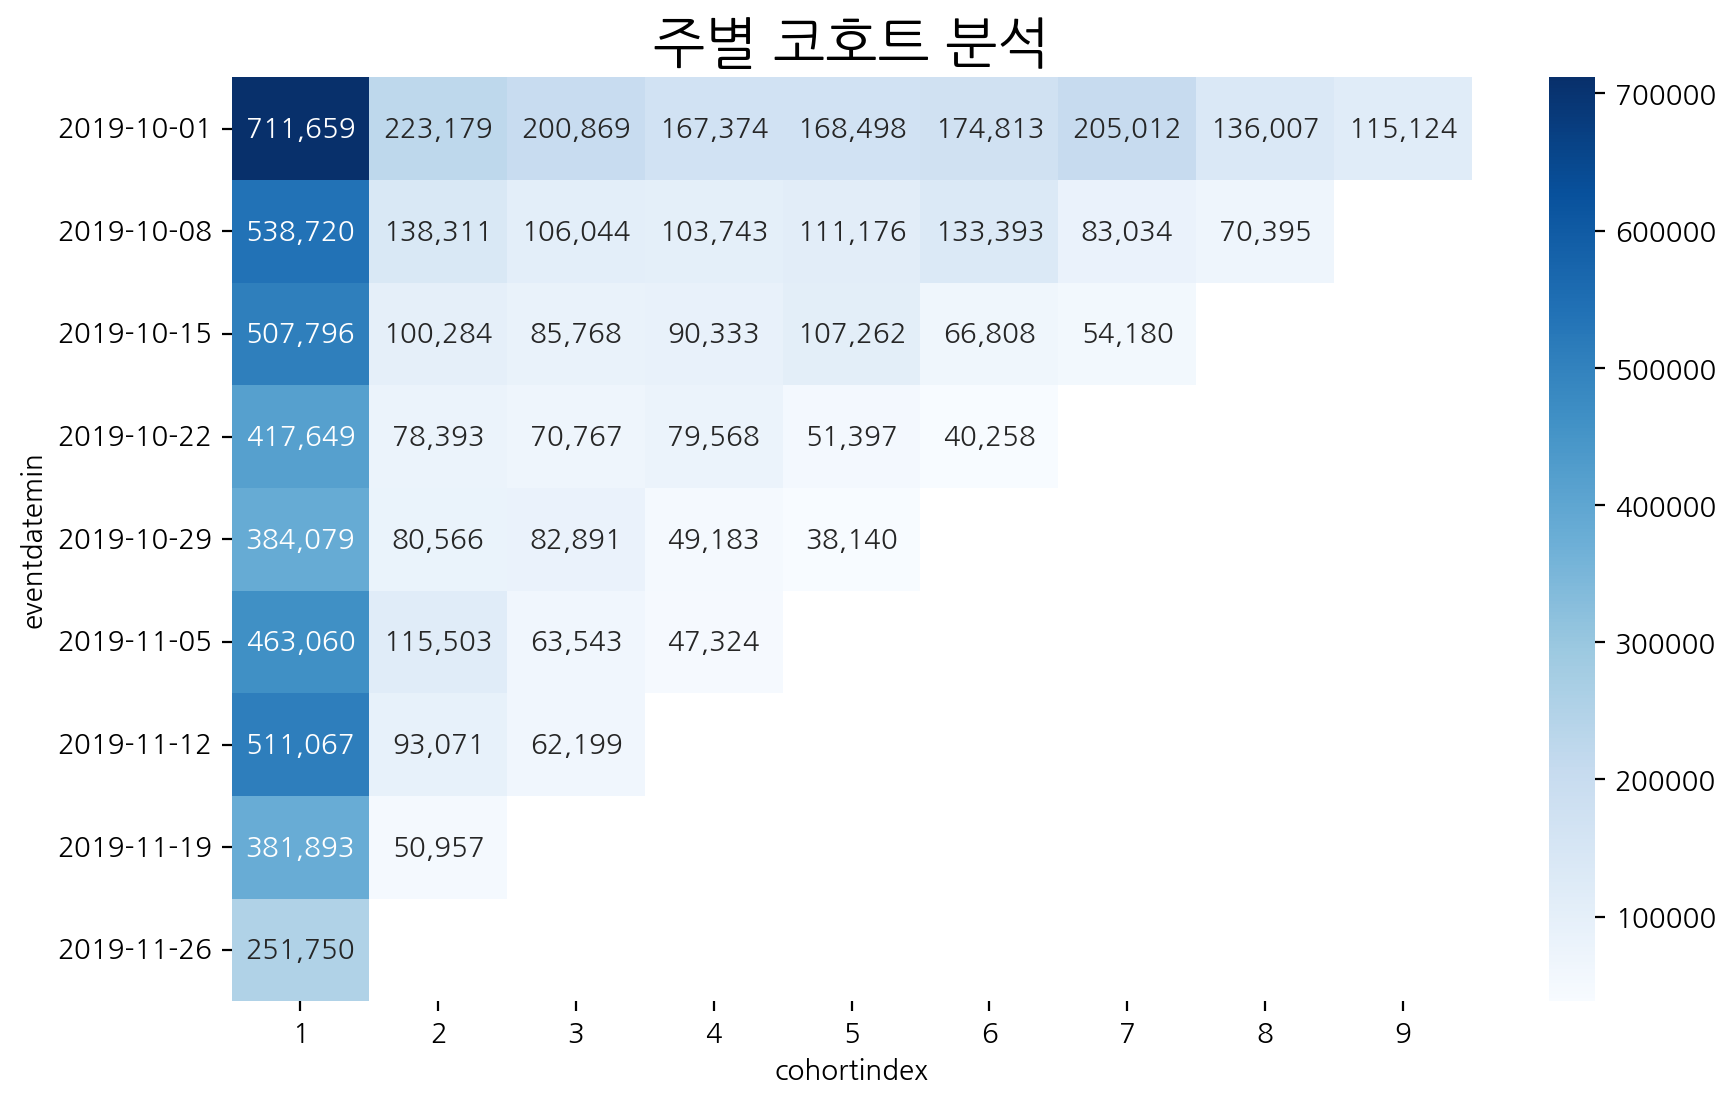

In [51]:
cohort_count.index = cohort_count.index.astype(str).str[:10]
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_count, annot=True, fmt=',.0f', cmap='Blues').set_title('주별 코호트 분석', fontsize=20);

In [52]:
# 일별 신규유입 고객수
cohort_count[1]

eventdatemin
2019-10-01    711659.0
2019-10-08    538720.0
2019-10-15    507796.0
2019-10-22    417649.0
2019-10-29    384079.0
2019-11-05    463060.0
2019-11-12    511067.0
2019-11-19    381893.0
2019-11-26    251750.0
Name: 1, dtype: float64

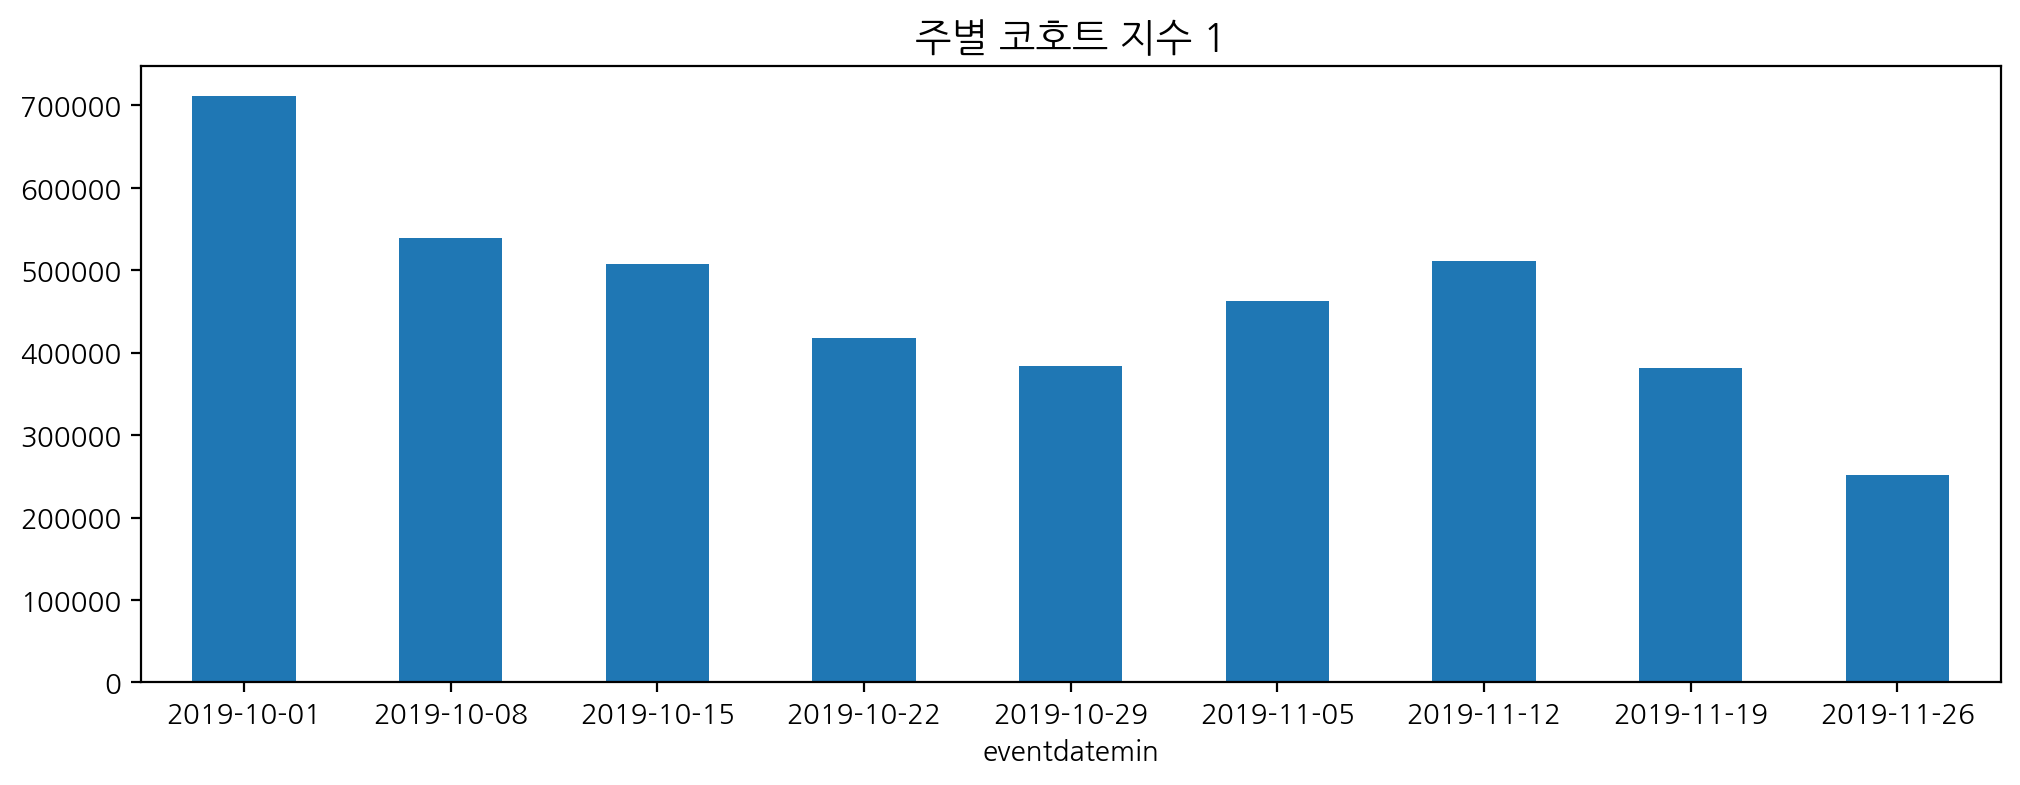

In [53]:
cohort_count[1].plot(kind='bar', figsize=(12, 4), rot=0).set_title('주별 코호트 지수 1', fontsize=14);

In [54]:
# 잔존율 구하기
cohort_norm = cohort_count.div(cohort_count[1], axis=0).round(2)
cohort_norm

cohortindex,1,2,3,4,5,6,7,8,9
eventdatemin,,,,,,,,,
2019-10-01,1.0,0.31,0.28,0.24,0.24,0.25,0.29,0.19,0.16
2019-10-08,1.0,0.26,0.20,0.19,0.21,0.25,0.15,0.13,NaN
2019-10-15,1.0,0.20,0.17,0.18,0.21,0.13,0.11,NaN,NaN
2019-10-22,1.0,0.19,0.17,0.19,0.12,0.10,NaN,NaN,NaN
2019-10-29,1.0,0.21,0.22,0.13,0.10,NaN,NaN,NaN,NaN
2019-11-05,1.0,0.25,0.14,0.10,NaN,NaN,NaN,NaN,NaN
2019-11-12,1.0,0.18,0.12,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-19,1.0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


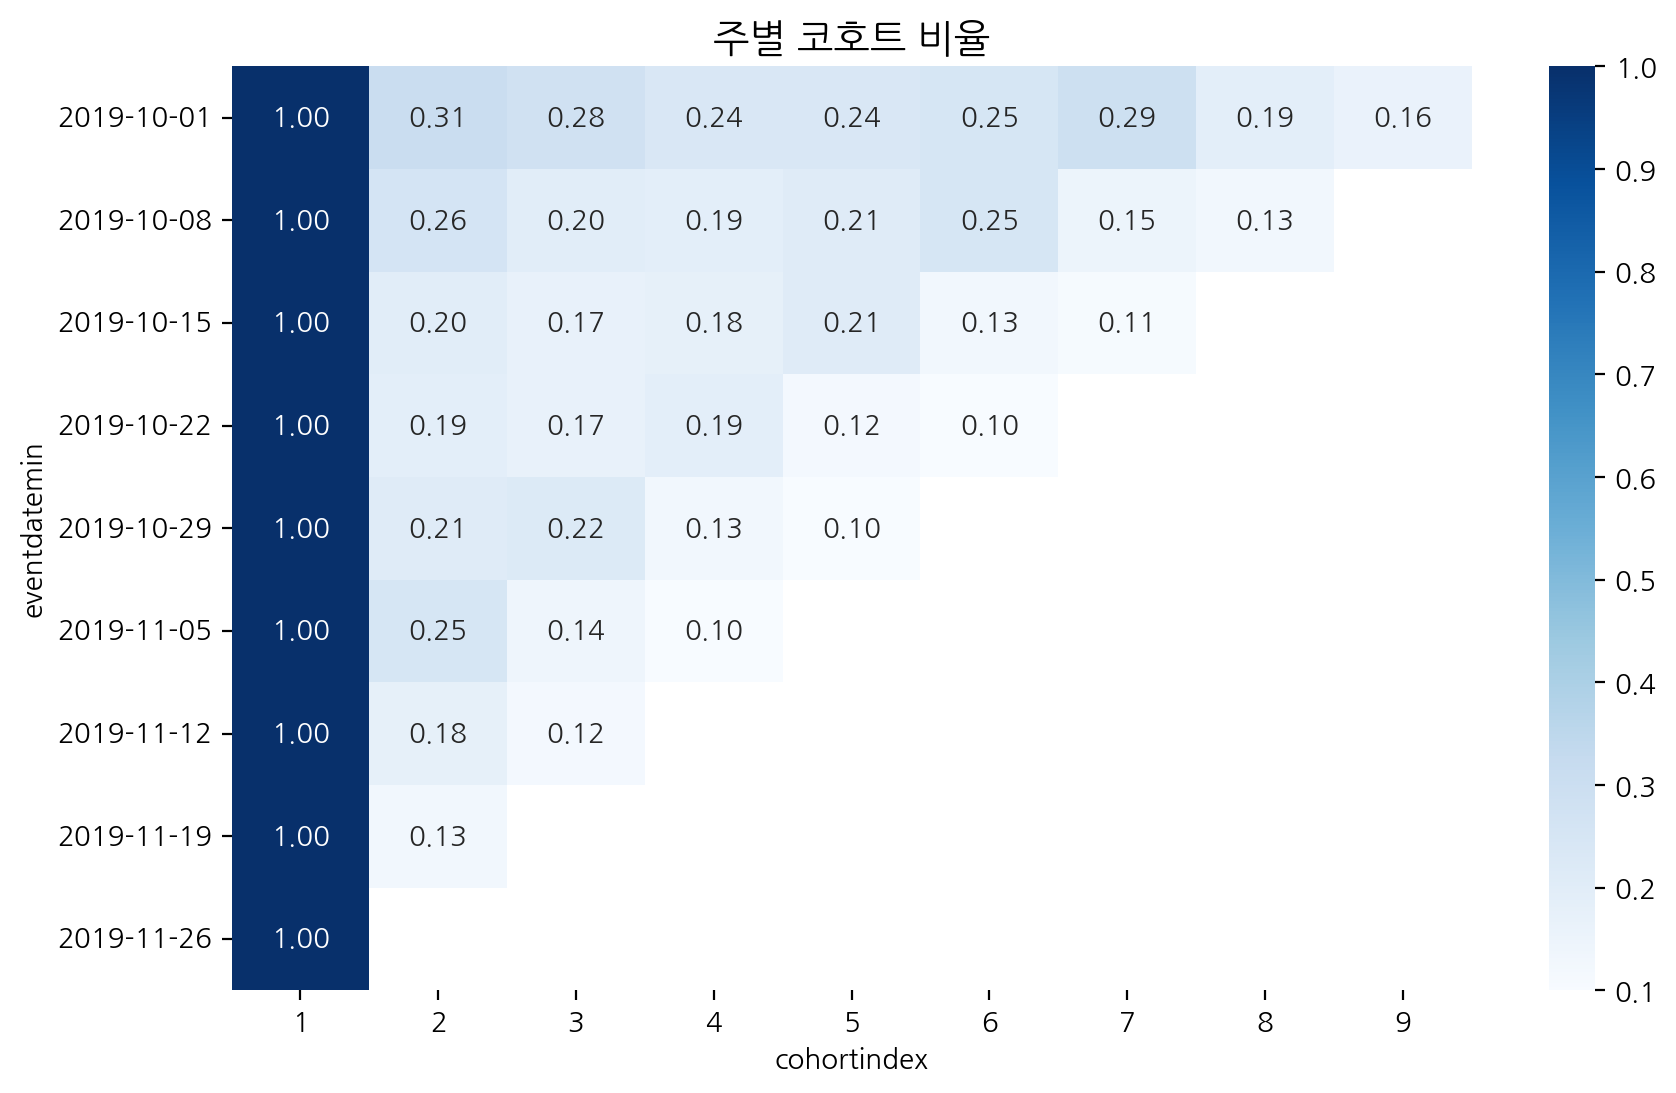

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_norm, annot=True, fmt='.2f', cmap='Blues').set_title('주별 코호트 비율', fontsize=14);